In [ ]:
from __future__ import print_function
import time
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, PowerTransformer, Normalizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
#from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Flatten, Dropout, Input
import tensorflow as tf
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold, RandomizedSearchCV
from scipy import interp

from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.model_selection import cross_validate

import nltk
from nltk.cluster import KMeansClusterer
from sklearn import cluster, metrics
nltk.download('punkt')
nltk.download('stopwords')

from gensim.models import Word2Vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
import math
from matplotlib.colors import ListedColormap
from matplotlib.cm import hsv

from matplotlib import rc
from matplotlib import font_manager as fm, rcParams 
import matplotlib.pyplot as plt 
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
!pip install -U -q PyDrive
from oauth2client.client import GoogleCredentials
import warnings
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
!pip install dataframe_image
import dataframe_image as dfi
#DL Models
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Input
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, Flatten, Dropout
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras.callbacks import Callback


import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, LabelBinarizer
warnings.filterwarnings('ignore')

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

#LatX fonts
import matplotlib.pyplot as plt
import seaborn as sns
#LatX fonts
from matplotlib import rc
from matplotlib import font_manager as fm, rcParams 
import matplotlib.pyplot as plt 
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rcParams['figure.dpi'] = 120
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [ ]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def build_df(file_id, file_name, index_col=None):
  downloaded = drive.CreateFile({'id':file_id})
  downloaded.GetContentFile(file_name)
  if index_col is not None :
    return pd.read_csv(file_name, index_col=index_col)
  return pd.read_csv(file_name)

df = build_df('1LEbg13-KBZzHmIWAv9SnthGUzjvcbJuA','stylo-data.csv')
news_df = build_df('15zZXsks6cI0FY4vpL555lBQSBr1QyjT4', 'news-data.csv' )
varela_df = build_df('1JoC7GlAmdQO9WPZeJZKMbv4djyQzeezC',  'varela-stylo-data.csv')
smaller_varela_df = varela_df[varela_df['Subject'] == 'LITERATURA']

varela_df.pop('Subject')

0       ASSUNTOS VARIADOS
1       ASSUNTOS VARIADOS
2       ASSUNTOS VARIADOS
3       ASSUNTOS VARIADOS
4       ASSUNTOS VARIADOS
              ...        
2995              TURISMO
2996              TURISMO
2997              TURISMO
2998              TURISMO
2999              TURISMO
Name: Subject, Length: 3000, dtype: object

In [ ]:
#Some clean-up on line breaks
def clean_df(df):
  df = df.replace(to_replace ='\r', value = ' ', regex = True) 
  df = df.replace(to_replace ='\n ', value = '\n', regex = True) 
  df = df.replace(to_replace ='\n', value = ' ', regex = True)
  df = df.replace(to_replace ='\n{2,*}', value = ' ', regex = True)
  return df

#Read textual datasets
raw_df_test = build_df('1B-Ozck3R_cMeREw3yQQcODcz8UZ8Hvp7', 'raw_data.csv')
raw_df = clean_df(build_df('1B-Ozck3R_cMeREw3yQQcODcz8UZ8Hvp7', 'raw_data.csv'))
raw_news_df = clean_df(build_df('1P0UF5IRI3VNUuAulldEn84ntVfFLGiIq', 'raw_news_data.csv'))
raw_varela_df = clean_df(build_df('1s-qn2puLikOtN1YGOX2WZfZrNMxA6K4e', 'raw_varela_data.csv'))
smaller_raw_varela_df = raw_varela_df[raw_varela_df['Subject'] == 'ASSUNTOS VARIADOS']

stylo_scores_df = build_df('1g4zAbrxtVSqJ1GwwXKJufqMHXpWSrLsC', 'stylo_scores.csv', index_col=0)
tfidf_scores_df = build_df('12RMTasYFx6WAi-OByHaTFI0_wRRTQytX', 'idf_scores.csv', index_col=0)

raw_news_df.pop('Link')
raw_varela_df.pop('Subject')
smaller_varela_df.pop('Subject')
smaller_raw_varela_df.pop('Subject')


def remove_varela_authors(df):
  regex_baleia = 'baleia - \d{1,2}\/\d{1,2}\/\d{2,4}'
  regex_ana = 'ana cristina cavalcante\s*\d{1,2} \w{1,4} \d{2,4} - \S{3,5}(min)*'
  regex_adriano = 'adriano gambarini - \d{1,2}\/\d{1,2}\/\d{2,4}'
  regex_ivolnildo = 'ivon(i)*l(d)*o lavôr(\s)*\d{1,2} \w{1,4} \d{2,4} - \S{4,5}(min)*'
  regex_mario = 'mário pinto(\s)*\d{1,2} \w{1,4} \d{2,4} - \S{4,5}(min)*'
  regex_julio = "mais sobr julio preuss - \d{1,2}\/\d{1,2}\/\d{2,4}(julio preussescreveu o livro 'fotografia digital: da compra da câmera à impressão das fotos)*"
  regex_roberto = 'roberto linsker - \d{1,2}\/\d{1,2}\/\d{2,4}'
  df['Text'] = df['Text'].str.replace(regex_baleia, ' ')
  df['Text'] = df['Text'].str.replace(regex_ana, ' ')
  df['Text'] = df['Text'].str.replace(regex_adriano, ' ')
  df['Text'] = df['Text'].str.replace(regex_ivolnildo, ' ')
  df['Text'] = df['Text'].str.replace(regex_mario, ' ')
  df['Text'] = df['Text'].str.replace(regex_julio, ' ')
  df['Text'] = df['Text'].str.replace(regex_roberto, ' ')
  return df

raw_varela_df = remove_varela_authors(raw_varela_df)
smaller_raw_varela_df = remove_varela_authors(smaller_raw_varela_df)
# Remove few class entries (We need at least 3 samples of an author) and encode Author column 

def remove_entries(df, size):
  return df.groupby('Author').filter(lambda x: len(x) > size)

def encode_target_column(df, column):
  le = LabelEncoder()
  y = df.pop(column)
  encoded_Y = le.fit_transform(y)
  return encoded_Y

df = remove_entries(df, 2)
raw_df = remove_entries(raw_df, 2)

encoded_Y = encode_target_column(df, 'Author')
encoded_raw_Y  = encode_target_column(raw_df, 'Author')

encoded_Y_news  = encode_target_column(news_df, 'Author')
raw_news_df.pop('Author')

varela_Y_backup = varela_df['Author']
encoded_varela_Y = encode_target_column(varela_df, 'Author')
encoded_small_varela_Y = encode_target_column(smaller_varela_df, 'Author')
raw_varela_df.pop('Author')
smaller_raw_varela_df.pop('Author')


corpus = raw_df['Text']
corpus_news = raw_news_df['Text']
corpus_varela = raw_varela_df['Text']

In [ ]:
smaller_varela_df

In [ ]:
smaller_raw_varela_df

In [ ]:
# Prepare our training and test sets
X_varela, X_varela_test, Y_varela, Y_varela_test = train_test_split(varela_df, encoded_varela_Y, random_state=7, test_size=0.3, stratify=encoded_varela_Y)
X_news, X_news_test, Y_news, Y_news_test = train_test_split(news_df, encoded_Y_news, random_state=7, test_size=0.3, stratify=encoded_Y_news)
X_student, X_student_test, Y_student, Y_student_test = train_test_split(df, encoded_Y, random_state=7, test_size=0.3, stratify=encoded_Y)

X_student_idf , X_student_idf_test, Y_student_idf, Y_student_idf_test = train_test_split(TfidfVectorizer().fit_transform(raw_df['Text']), encoded_Y, random_state=7, test_size=0.25, stratify=encoded_Y)
X_news_idf , X_news_idf_test, Y_news_idf, Y_news_idf_test = train_test_split(TfidfVectorizer().fit_transform(raw_news_df['Text']), encoded_Y_news, random_state=7, test_size=0.3, stratify=encoded_Y_news)
X_varela_idf , X_varela_idf_test, Y_varela_idf, Y_varela_idf_test = train_test_split(TfidfVectorizer().fit_transform(raw_varela_df['Text']), encoded_varela_Y, random_state=7, test_size=0.3, stratify=encoded_varela_Y)

# df['Author'] = encoded_Y
# news_df['Author'] = encoded_Y_news
# varela_df['Author'] = encoded_varela_Y

In [ ]:
X_varela, X_varela_test, Y_varela, Y_varela_test = train_test_split(smaller_varela_df, encoded_small_varela_Y, random_state=7, test_size=0.3, stratify=encoded_small_varela_Y)
X_varela_idf , X_varela_idf_test, Y_varela_idf, Y_varela_idf_test = train_test_split(TfidfVectorizer().fit_transform(smaller_raw_varela_df['Text']), encoded_small_varela_Y, random_state=7, test_size=0.3, stratify=encoded_small_varela_Y)

In [ ]:
def train_and_report(classifier, X, X_test, Y, Y_test, dataset_name, average='macro', verbose=True):

  clf = classifier.fit(X, Y)
  y_pred = clf.predict(X_test)
  print(dataset_name)
  acc = accuracy_score(Y_test, y_pred)
  print('ACCURACY:', acc)
  roc_auc_dict = roc_auc_score_multiclass(Y_test, y_pred, average=average)
  print('ROC AUC MEAN:', np.mean(list(roc_auc_dict.values())))

  if verbose:
    print('BLA')

  return np.mean(list(roc_auc_dict.values())), acc

# Verification evaluation functions

def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict


def classification_report(y_true, y_pred, y_score=None, average='micro'):
    if y_true.shape != y_pred.shape:
        print("Error! y_true %s is not the same shape as y_pred %s" % (
              y_true.shape,
              y_pred.shape)
        )
        return

    lb = LabelBinarizer()

    if len(y_true.shape) == 1:
        lb.fit(y_true)

    #Value counts of predictions
    labels, cnt = np.unique(
        y_pred,
        return_counts=True)
    n_classes = len(labels)
    pred_cnt = pd.Series(cnt, index=labels)

    metrics_summary = precision_recall_fscore_support(
            y_true=y_true,
            y_pred=y_pred,
            labels=labels)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index,
        columns=labels)

    support = class_report_df.loc['support']
    total = support.sum() 
    class_report_df['avg / total'] = avg[:-1] + [total]

    class_report_df = class_report_df.T
    class_report_df['pred'] = pred_cnt
    class_report_df['pred'].iloc[-1] = total

    if not (y_score is None):
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for label_it, label in enumerate(labels):
            fpr[label], tpr[label], _ = roc_curve(
                (y_true == label).astype(int), 
                y_score[:, label_it])

            roc_auc[label] = auc(fpr[label], tpr[label])

        if average == 'micro':
            if n_classes <= 2:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                    lb.transform(y_true).ravel(), 
                    y_score[:, 1].ravel())
            else:
                fpr["avg / total"], tpr["avg / total"], _ = roc_curve(
                        lb.transform(y_true).ravel(), 
                        y_score.ravel())

            roc_auc["avg / total"] = auc(
                fpr["avg / total"], 
                tpr["avg / total"])

        elif average == 'macro':
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([
                fpr[i] for i in labels]
            ))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in labels:
                mean_tpr += interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            fpr["macro"] = all_fpr
            tpr["macro"] = mean_tpr

            roc_auc["avg / total"] = auc(fpr["macro"], tpr["macro"])

        class_report_df['AUC'] = pd.Series(roc_auc)

    return class_report_df

In [ ]:

model_names = ['RL', 'NB Gaus', 'Random Forest','Árvores Extra','MLP']
scaling_names = ['ns', 'ss', 'mm', 'pt']

def build_metrics_df(model_names, metrics, scales):
  rows = pd.Series(model_names)
  cols = pd.Series(metrics)
  idx = pd.MultiIndex.from_product([rows, scales])
  return pd.DataFrame(index=idx, columns=cols)

test = build_metrics_df(model_names, metrics, scaling_names)

In [ ]:
stylo_data = [
   [X_student, X_student_test, Y_student, Y_student_test],
   [X_news, X_news_test, Y_news, Y_news_test], 
   [X_varela, X_varela_test, Y_varela, Y_varela_test] ]

tfidf_data = [
   [X_student_idf.toarray(), X_student_idf_test.toarray(), Y_student_idf, Y_student_idf_test],
   [X_news_idf.toarray(), X_news_idf_test.toarray(), Y_news_idf, Y_news_idf_test], 
   [X_varela_idf.toarray(), X_varela_idf_test.toarray(), Y_varela_idf, Y_varela_idf_test] ]

In [ ]:
models = [LogisticRegression(random_state=0), GaussianNB(), 
          RandomForestClassifier(random_state=0), ExtraTreesClassifier(random_state=0), 
          MLPClassifier(random_state=0)]

scalers = [StandardScaler(), StandardScaler(), MinMaxScaler(), PowerTransformer()]
metrics = ['acurácia', 'roc auc']

def set_scores(df, model_name, scale, acc, auc):
  df.loc[model_name, scale]['acurácia'] = acc
  df.loc[model_name, scale]['roc auc'] = auc


def scaling(scaler, data):
  return [scaler.fit_transform(X) for X in data]


def run_classic_models(data):
  student_stylo_acc_df = build_metrics_df(model_names, metrics, scaling_names)
  news_stylo_acc_df = student_stylo_acc_df.copy()
  varela_stylo_acc_df = student_stylo_acc_df.copy()
  for idx, scaler in enumerate(scalers):
    print(scaling_names[idx])
    if scaling_names[idx] != 'ns':
      scaled_data = scaling(scaler, [data[0][0], data[0][1], data[1][0], data[1][1], data[2][0], data[2][1]])
    else:
      print('no scaling')
      scaled_data = [data[0][0], data[0][1], data[1][0], data[1][1], data[2][0], data[2][1]]

    for model, model_name in zip(models, model_names):
      auc, acc = train_and_report(model, scaled_data[0], scaled_data[1], data[0][2], data[0][3], 'Base de Varela', average="macro", verbose=False)
      set_scores(student_stylo_acc_df, model_name, scaling_names[idx], acc, auc)
      
      auc, acc = train_and_report(model, scaled_data[2], scaled_data[3], data[1][2], data[1][3], 'Base de Varela', average="macro", verbose=False)
      set_scores(news_stylo_acc_df, model_name, scaling_names[idx], acc, auc)
        
      auc, acc = train_and_report(model, scaled_data[4], scaled_data[5], data[2][2], data[2][3], 'Base Varela', average="macro", verbose=False )
      set_scores(varela_stylo_acc_df, model_name, scaling_names[idx], acc, auc)

  return student_stylo_acc_df, news_stylo_acc_df, varela_stylo_acc_df  


In [ ]:
tf_varela = [[X_varela_idf.toarray(), X_varela_idf_test.toarray(), Y_varela_idf, Y_varela_idf_test],
             [X_varela_idf.toarray(), X_varela_idf_test.toarray(), Y_varela_idf, Y_varela_idf_test],
             [X_varela_idf.toarray(), X_varela_idf_test.toarray(), Y_varela_idf, Y_varela_idf_test]]

In [ ]:
stylo_varela = [[X_varela, X_varela_test, Y_varela, Y_varela_test],
                [X_varela, X_varela_test, Y_varela, Y_varela_test],
                [X_varela, X_varela_test, Y_varela, Y_varela_test]]

In [ ]:
var_tf , _, _ = run_classic_models(tf_varela)

ns
no scaling
Base de Varela
ACCURACY: 0.9888888888888889
ROC AUC MEAN: 0.9938271604938272
Base de Varela
ACCURACY: 0.9888888888888889
ROC AUC MEAN: 0.9938271604938272
Base Varela
ACCURACY: 0.9888888888888889
ROC AUC MEAN: 0.9938271604938272
Base de Varela
ACCURACY: 0.7333333333333333
ROC AUC MEAN: 0.8518518518518519
Base de Varela
ACCURACY: 0.7333333333333333
ROC AUC MEAN: 0.8518518518518519
Base Varela
ACCURACY: 0.7333333333333333
ROC AUC MEAN: 0.8518518518518519
Base de Varela
ACCURACY: 0.9
ROC AUC MEAN: 0.9444444444444443
Base de Varela
ACCURACY: 0.9
ROC AUC MEAN: 0.9444444444444443
Base Varela
ACCURACY: 0.9
ROC AUC MEAN: 0.9444444444444443
Base de Varela
ACCURACY: 0.9444444444444444
ROC AUC MEAN: 0.9691358024691358
Base de Varela
ACCURACY: 0.9444444444444444
ROC AUC MEAN: 0.9691358024691358
Base Varela
ACCURACY: 0.9444444444444444
ROC AUC MEAN: 0.9691358024691358
Base de Varela
ACCURACY: 0.9666666666666667
ROC AUC MEAN: 0.9814814814814815
Base de Varela
ACCURACY: 0.966666666666666

In [ ]:
var, _, _ = run_classic_models(stylo_varela)

ns
no scaling
Base de Varela
ACCURACY: 0.43333333333333335
ROC AUC MEAN: 0.6851851851851851
Base de Varela
ACCURACY: 0.43333333333333335
ROC AUC MEAN: 0.6851851851851851
Base Varela
ACCURACY: 0.43333333333333335
ROC AUC MEAN: 0.6851851851851851
Base de Varela
ACCURACY: 0.6666666666666666
ROC AUC MEAN: 0.8148148148148149
Base de Varela
ACCURACY: 0.6666666666666666
ROC AUC MEAN: 0.8148148148148149
Base Varela
ACCURACY: 0.6666666666666666
ROC AUC MEAN: 0.8148148148148149
Base de Varela
ACCURACY: 0.6333333333333333
ROC AUC MEAN: 0.7962962962962963
Base de Varela
ACCURACY: 0.6333333333333333
ROC AUC MEAN: 0.7962962962962963
Base Varela
ACCURACY: 0.6333333333333333
ROC AUC MEAN: 0.7962962962962963
Base de Varela
ACCURACY: 0.6666666666666666
ROC AUC MEAN: 0.8148148148148149
Base de Varela
ACCURACY: 0.6666666666666666
ROC AUC MEAN: 0.8148148148148149
Base Varela
ACCURACY: 0.6666666666666666
ROC AUC MEAN: 0.8148148148148149
Base de Varela
ACCURACY: 0.32222222222222224
ROC AUC MEAN: 0.6234567901

In [ ]:
var

acurácia   roc auc
RL            ns  0.433333  0.685185
              ss  0.744444  0.858025
              mm  0.566667  0.759259
              pt  0.666667  0.814815
NB Gaus       ns  0.666667  0.814815
              ss  0.133333  0.518519
              mm  0.244444  0.580247
              pt       0.1       0.5
Random Forest ns  0.633333  0.796296
              ss       0.7  0.833333
              mm  0.466667  0.703704
              pt  0.655556  0.808642
Árvores Extra ns  0.666667  0.814815
              ss  0.677778  0.820988
              mm  0.555556  0.753086
              pt  0.666667  0.814815
MLP           ns  0.322222  0.623457
              ss  0.688889   0.82716
              mm  0.588889  0.771605
              pt       0.7  0.833333

In [ ]:
build_metrics_df(model_names, metrics, scaling_names)

In [ ]:
deep_model_names = ['NN']
metrics = ['acurácia', 'roc auc macro', 'roc auc mic', 'perda']  

def set_deep_scores(df, model_name, scale, acc, roc_auc_mac, roc_auc_mic, loss):
  response_df = df.copy()
  response_df.loc[model_name, scale]['acurácia'] = acc
  response_df.loc[model_name, scale]['roc auc macro'] = roc_auc_mac
  response_df.loc[model_name, scale]['roc auc mic'] = roc_auc_mic
  response_df.loc[model_name, scale]['perda'] = loss
  return response_df

def build_and_train(X, X_test, Y,  Y_test, input_size, epochs=300):
  nn = build_nn(input_size, len(set(Y)))
  print('nn built')
  hist = train_nn(nn, X, X_test, Y,  Y_test, epochs)
  print('nn trained')
  print('train accuracy{}'.format(hist.history['accuracy'][-1]))
  return hist


def scaling(scaler, data):
  return [scaler.fit_transform(X) for X in data]

def split_build_and_train(df, y, input_size, epochs=300):
  X, X_test, Y, Y_test = train_test_split(df, y, random_state=0, test_size=0.3, stratify=y)
  return build_and_train(X, X_test, Y, Y_test, input_size, epochs)

def build_large_nn(input_size, num_of_classes):
    print('input size:{}, num of classes:{}'.format(input_size, num_of_classes))
    model = Sequential()
    model.add(Dense(100, input_dim=input_size, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(80, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(40, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_small_nn(input_size, num_of_classes):
    print('input size:{}, num of classes:{}'.format(input_size, num_of_classes))
    model = Sequential()
    model.add(Dense(64, input_dim=input_size, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(16, activation='selu'))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_nn(model, X, X_test, Y, Y_test, epochs=300): 
  Y_cat = tf.keras.utils.to_categorical(Y, num_classes=len(set(Y)))
  Y_cat_test = tf.keras.utils.to_categorical(Y_test, num_classes=len(set(Y)))
  return model.fit(X, Y_cat, validation_data=(X_test, Y_cat_test), epochs=epochs, verbose=0)

def build_lstm():
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[tf.keras.metrics.CategoricalAccuracy()])
    return model

def build_small_nn_full(input_size, num_of_classes, initializer, dropout, optimizer, op_fun='softmax'):
  print('input size:{}, num of classes:{}'.format(input_size, num_of_classes))
  model = Sequential()
  model.add(Dense(64, input_dim=input_size, kernel_initializer=initializer , activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(dropout))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(num_of_classes, activation=op_fun))
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model


def build_large_nn_full(input_size, num_of_classes, initializer, dropout, optimizer):
    print('input size:{}, num of classes:{}'.format(input_size, num_of_classes))
    model = Sequential()
    model.add(Dense(100, input_dim=input_size, kernel_initializer=initializer, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(40, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def binarize_split_scale(X, Y, scaler, scaler_name, scale=True):
    # lb = LabelBinarizer() 
    # y = lb.fit_transform(Y)
    # print(y.shape)
    n_classes = len(set(Y))
    #X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0, test_size=0.3)
    X_train, X_test, Y_train, Y_test = train_test_split(X, to_categorical(Y), test_size=0.3, stratify=Y)

    if scale and scaler_name != 'ns':
      scaled_data = scaling(scaler, [X_train, X_test])
    else:
      print('no scaling')
      scaled_data = [X_train, X_test]
    
    return scaled_data, Y_train, Y_test, n_classes
    

def roc_auc_multiclass_nn(X_train, X_test, Y_train, Y_test, n_classes, epochs, columns=True, roc=True):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    acc = 0
    roc_auc = dict()
  
    nn_input_size = X_train.shape[1]
    if columns:
      #estimator = KerasClassifier(build_fn=build_small_nn, input_size=nn_input_size, num_of_classes=n_classes,  epochs=200, batch_size=128)
      estimator = build_small_nn(nn_input_size, n_classes)
    else:
      estimator = build_large_nn(nn_input_size, n_classes)
      #estimator = KerasClassifier(build_fn=build_large_nn, input_size=nn_input_size, num_of_classes=n_classes,  epochs=200, batch_size=128)
    
    hist = estimator.fit(X_train, Y_train, verbose=0, epochs=epochs)

    print('finished training')
    
  
    scores = estimator.evaluate(X_test, Y_test)
    y_pred_keras = estimator.predict(X_test)
    print(scores)
    
    loss = scores[0]
    acc = scores[1]

    if roc:
      for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_pred_keras[:, i])
        
        if (np.isnan(sum(tpr[i]))):
          tpr[i] = [0.5] * len(tpr[i])

        if (np.isnan(sum(fpr[i]))):
          fpr[i] = [0.5] * len(fpr[i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_pred_keras.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

      # Compute macro-average ROC curve and ROC area
      # First aggregate all false positive rates
      all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

      # Then interpolate all ROC curves at this points
      mean_tpr = np.zeros_like(all_fpr)
      for i in range(n_classes):
          mean_tpr += interp(all_fpr, fpr[i], tpr[i])

      # Finally average it and compute AUC
      mean_tpr /= n_classes

      fpr["macro"] = all_fpr
      tpr["macro"] = mean_tpr
      roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
      print(roc_auc)
    return roc_auc, tpr, fpr, hist, acc, loss

scalers = [StandardScaler(), StandardScaler(), MinMaxScaler(), PowerTransformer()]


def run_deep_models(data, cols=True):
  student_stylo_acc_df = build_metrics_df(deep_model_names, metrics, scaling_names)
  news_stylo_acc_df = student_stylo_acc_df.copy()
  varela_stylo_acc_df = student_stylo_acc_df.copy()

  for idx, scaler in enumerate(scalers):
    print(scaling_names[idx])

    scaled_data, Y, Y_test, n_classes = binarize_split_scale(data[0][0], data[0][1], scaler , scaling_names[idx], True)
    roc, _, _, hist_s, acc, loss = roc_auc_multiclass_nn(scaled_data[0], scaled_data[1], Y, Y_test, n_classes, 200, cols)
    student_stylo_acc_df = set_deep_scores(student_stylo_acc_df, 'NN', scaling_names[idx], acc, roc["macro"], roc["micro"], loss)

    scaled_data, Y, Y_test, n_classes = binarize_split_scale(data[1][0], data[1][1], scaler, scaling_names[idx], True)
    roc, _, _, hist_n, acc, loss = roc_auc_multiclass_nn(scaled_data[0], scaled_data[1], Y, Y_test, n_classes, 200, cols)
    news_stylo_acc_df = set_deep_scores(news_stylo_acc_df, 'NN', scaling_names[idx], acc, roc["macro"], roc["micro"], loss)

    scaled_data, Y, Y_test, n_classes = binarize_split_scale(data[2][0], data[2][1], scaler , scaling_names[idx], True)
    roc, _, _, hist_v, acc, loss = roc_auc_multiclass_nn(scaled_data[0], scaled_data[1], Y, Y_test, n_classes, 200, cols)
    varela_stylo_acc_df = set_deep_scores(varela_stylo_acc_df, 'NN', scaling_names[idx], acc, roc["macro"], roc["micro"], loss)

  
  return student_stylo_acc_df, news_stylo_acc_df, varela_stylo_acc_df

nn_stylo_data = [
           [df, encoded_Y],
           [news_df, encoded_Y_news],
           [varela_df, encoded_varela_Y]
]

nn_tfidf_data = [
   [TfidfVectorizer(binary=True).fit_transform(raw_df['Text']).toarray(), encoded_Y],
   [TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news], 
   [TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y]
]

var_tf_nn, _ , _ = run_deep_models(nn_tf_varela, False)
var_stylo_nn, _, _ = run_deep_models(nn_stylo_varela, True)



ns
no scaling
input size:21327, num of classes:10
finished training
3/3 [==============================] - 0s 7ms/step - loss: 0.2446 - accuracy: 0.9111
[0.2446107268333435, 0.9111111164093018]
{0: 0.9931412894375857, 'micro': 0.9958710562414266, 1: 0.9986282578875171, 2: 1.0, 3: 1.0, 4: 0.9986282578875171, 5: 1.0, 6: 1.0, 7: 1.0, 8: 0.9684499314128943, 9: 1.0, 'macro': 0.9975308641975308}
no scaling
input size:21327, num of classes:10
finished training
3/3 [==============================] - 0s 7ms/step - loss: 0.1958 - accuracy: 0.9444
[0.19581672549247742, 0.9444444179534912]
{0: 0.9986282578875172, 'micro': 0.9977229080932785, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 0.9986282578875172, 6: 1.0, 7: 0.99039780521262, 8: 0.9945130315500685, 9: 1.0, 'macro': 0.9988340192043896}
no scaling
input size:21327, num of classes:10
finished training
3/3 [==============================] - 0s 7ms/step - loss: 0.3154 - accuracy: 0.9222
[0.3154062330722809, 0.9222221970558167]
{0: 1.0, 'micro': 0.9927160

In [ ]:
nn_stylo_varela = [
                   [smaller_varela_df, encoded_small_varela_Y],
                   [smaller_varela_df, encoded_small_varela_Y],
                   [smaller_varela_df, encoded_small_varela_Y]]

nn_tf_varela = [
                [TfidfVectorizer(binary=True).fit_transform(smaller_raw_varela_df['Text']).toarray(), encoded_small_varela_Y],
                [TfidfVectorizer(binary=True).fit_transform(smaller_raw_varela_df['Text']).toarray(), encoded_small_varela_Y],
                [TfidfVectorizer(binary=True).fit_transform(smaller_raw_varela_df['Text']).toarray(), encoded_small_varela_Y]]

In [ ]:

scaled_data, Y, Y_test, n_classes = binarize_split_scale(TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news, PowerTransformer(), 'pt')
roc, _, _, hist_n = roc_auc_multiclass_nn(scaled_data[0], scaled_data[1], Y, Y_test, n_classes, 200,  True)
print(hist_n.history['val_accuracy'][-1])


In [ ]:

model_keras = KerasClassifier(
      build_fn = build_large_nn,
      input_size = news_x.shape[1],
      num_of_classes = len(set(encoded_Y_news)),
      epochs=200, verbose=1)

cv_res = cross_validate(model_keras, news_x, to_categorical(encoded_Y_news), cv=3, return_train_score=False)


In [ ]:
from sklearn.model_selection import cross_validate

cv_res = cross_validate(model_keras, news_x, y, cv=3)

input size:11135, num of classes:10
input size:11135, num of classes:10
input size:11135, num of classes:10


In [ ]:
std.merge(news, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(var, left_index=True, right_index=True)


acurácia_estudantes roc auc macro_estudantes  ... roc auc mic    perda
NN ns            0.115385                 0.497708  ...    0.881773  3.41155
   ss            0.115385                 0.646926  ...     0.87929   3.5451
   mm            0.115385                 0.530229  ...    0.500004  4.60595
   pt           0.0769231                 0.463208  ...    0.896952  3.29733

[4 rows x 12 columns]

In [ ]:
std.merge(news, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(var, left_index=True, right_index=True).to_csv('new-nn-stylo.csv')
std.merge(news, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(var, left_index=True, right_index=True)

acurácia_estudantes roc auc macro_estudantes  ... roc auc mic    perda
NN ns            0.115385                  0.56072  ...    0.499998  4.60612
   ss            0.230769                 0.643834  ...    0.975075  1.95322
   mm           0.0769231                 0.619931  ...    0.952392  2.78634
   pt            0.192308                 0.639968  ...    0.976398  1.90397

[4 rows x 12 columns]

In [ ]:
std_idf.merge(news_idf, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(var_idf, left_index=True, right_index=True).to_csv('new-nn-idf-scaled.csv')
std_idf.merge(news_idf, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(var_idf, left_index=True, right_index=True)

acurácia_estudantes roc auc macro_estudantes  ... roc auc mic    perda
NN ns            0.307692                 0.801935  ...    0.974354  1.86683
   ss            0.269231                 0.711074  ...     0.95408  2.24337
   mm            0.230769                 0.687249  ...    0.975268   1.4988
   pt            0.230769                  0.75776  ...      0.9122   2.8473

[4 rows x 12 columns]

In [ ]:
stylo_scores

acurácia_estudantes  ...  roc auc_varela
RL            Sem normalização              0.230769  ...        0.589787
              Standard Scaler               0.153846  ...        0.801347
              Min Max                       0.230769  ...        0.756453
              Power Transformer             0.230769  ...        0.804714
NB Gaus       Sem normalização              0.115385  ...        0.775533
              Standard Scaler               0.115385  ...        0.514590
              Min Max                       0.076923  ...        0.562851
              Power Transformer             0.038462  ...        0.514590
Random Forest Sem normalização              0.115385  ...        0.778339
              Standard Scaler               0.115385  ...        0.778339
              Min Max                       0.153846  ...        0.722222
              Power Transformer             0.115385  ...        0.782828
Árvores Extra Sem normalização              0.076923  ...        0.783951
              Standard Scaler               0.115385  ...        0.782828
              Min Max                       0.115385  ...        0.713244
              Power Transformer             0.192308  ...        0.795174
MLP           Sem normalização              0.192308  ...        0.618406
              Standard Scaler               0.192308  ...        0.796296
              Min Max                       0.115385  ...        0.776094
              Power Transformer             0.192308  ...        0.809764
NN            Sem normalização              0.115385  ...        0.570231
              Standard Scaler               0.230769  ...        0.694105
              Min Max                       0.076923  ...        0.870880
              Power Transformer             0.192308  ...        0.717098

[24 rows x 6 columns]

In [ ]:
student_df, news_df, varela_df = run_classic_models(tfidf_data)

In [ ]:
student_df.merge(news_df, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(varela_df, left_index=True, right_index=True).to_csv('scaled-stylo-score.csv')

In [ ]:
student_idf_df, news_idf_df, varela_idf_df = run_classic_models(tfidf_data)

In [ ]:
student_idf_df.merge(news_idf_df, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(varela_idf_df, left_index=True, right_index=True)

In [ ]:
student_idf_df.merge(news_idf_df, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(varela_idf_df, left_index=True, right_index=True).to_csv('scaled-idf-score.csv')

In [ ]:
scaled_df.to_latex()

In [ ]:
def merge_and_build_acc_df(students_df, news_df, varela_df):
    merged_df = students_df.merge(news_df, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(varela_df, left_index=True, right_index=True)
    return build_acc_df(merged_df)

def merge_and_build_auc_df(students_df, news_df, varela_df):
    merged_df = students_df.merge(news_df, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(varela_df, left_index=True, right_index=True)
    return build_auc_df(merged_df)

def build_acc_df(df, nn=False):
    merged_df = df.copy()
    merged_df.drop(columns='roc auc_estudantes', inplace=True)
    merged_df.drop(columns='roc auc_notícias', inplace=True)
    merged_df.drop(columns='roc auc', inplace=True)
    merged_df.rename(columns={'acurácia_estudantes': 'Estudantes', 'acurácia_notícias' : 'Notícias', 'acurácia':'Varela'}, inplace=True)
    return merged_df

def build_auc_df(df, nn=False):
    merged_df = df.copy()
    merged_df.drop(columns='acurácia_estudantes', inplace=True)
    merged_df.drop(columns='acurácia_notícias', inplace=True)
    merged_df.drop(columns='acurácia', inplace=True)
    merged_df.rename(columns={'roc auc_estudantes': 'Estudantes', 'roc auc_notícias' : 'Notícias', 'roc auc':'Varela'}, inplace=True)
    return merged_df


In [ ]:
merged_df = student_acc.merge(news_acc, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias')).merge(varela_acc, left_index=True, right_index=True)
merged_df.drop(columns='roc auc_estudantes', inplace=True)
merged_df.drop(columns='roc auc_notícias', inplace=True)
merged_df.drop(columns='roc auc', inplace=True)
merged_df.rename(columns={'acurácia_estudantes': 'Estudantes', 'acurácia_notícias' : 'Notícias', 'acurácia':'Varela'}, inplace=True)

merged_df

In [ ]:
stylo_scores_df = build_df('1_mnFalKzNJcZNnBnttON3HHoNTv6s4lS', 'stylo_scores.csv', index_col=0)
tfidf_scores_df = build_df('12RMTasYFx6WAi-OByHaTFI0_wRRTQytX', 'idf_scores.csv', index_col=0)

stylo_scores_scaled_df = build_df('1W-WCQ1ATEQErG2Mv3Vs3wEVCXJtdo42m', 'stylo_scores.csv', index_col=[0,1])
tfidf_scores_scaled_df = build_df('1hH5i3Gk5_Z_FztWmSk4G4M20_nY37gz8', 'idf_scores.csv', index_col=[0,1])

nn_stylo_scaled_df = build_df('1z5nQ5HrvB27AnV8mH7tBDf4RaeBek3n3', 'nn_stylo_scores.csv', index_col=[0,1])
nn_idf_scaled_df = build_df('1S2S31meoaQeJbWlU2OHmLhlLGZZaqaKL', 'nn_idf_scores.csv', index_col=[0,1])



In [ ]:
re_nn_no_scaling = {
    'acurácia_estudantes': 0.115385,
    'roc auc_estudantes': 0.530229,
    #'perda Estudantes': 2.70856,
    'acurácia_notícias': 0.433333,
    'roc auc_notícias': 0.651852,
    #'perda Notícias': 2.01479,
    'acurácia': 0.173333,
    'roc auc': 0.56298,
    #'perda Varela': 3.41155,
}

rt_nn_no_scaling = {
    'acurácia_estudantes': 0.230769,
    'roc auc_estudantes': 0.568946,
    #'perda Estudantes': 3.50833,
    'acurácia_notícias': 0.8,
    'roc auc_notícias': 0.974938,
    #'perda Notícias': 0.575504,
    'acurácia': 0.574444,
    'roc auc': 0.86904,
    #'perda Varela': 2.11421
}

In [ ]:
nn_stylo_scaled_df.loc['NN','ns']['acurácia_estudantes'] = re_nn_no_scaling['acurácia_estudantes']
nn_stylo_scaled_df.loc['NN','ns']['acurácia_notícias'] = re_nn_no_scaling['acurácia_notícias']
nn_stylo_scaled_df.loc['NN','ns']['acurácia'] = re_nn_no_scaling['acurácia']

nn_idf_scaled_df.loc['NN','ns']['acurácia_estudantes'] = rt_nn_no_scaling['acurácia_estudantes']
nn_idf_scaled_df.loc['NN','ns']['acurácia_notícias'] = rt_nn_no_scaling['acurácia_notícias']
nn_idf_scaled_df.loc['NN','ns']['acurácia'] = rt_nn_no_scaling['acurácia']

nn_stylo_scaled_df.rename(columns={'roc auc mic_estudantes': 'roc auc_estudantes', 
                                   'roc auc mic_notícias': 'roc auc_notícias', 
                                   'roc auc mic': 'roc auc_varela',
                                   'acurácia': 'acurácia_varela'
                                   }, inplace=True)


nn_idf_scaled_df.rename(columns={'roc auc mic_estudantes': 'roc auc_estudantes', 
                                   'roc auc mic_notícias': 'roc auc_notícias', 
                                   'roc auc mic': 'roc auc_varela',
                                   'acurácia': 'acurácia_varela'}
                        , inplace=True)

nn_stylo_scaled_df.drop(columns=['perda', 'perda_estudantes', 'perda_notícias', 'roc auc macro_estudantes', 'roc auc macro_notícias', 'roc auc macro'], inplace=True)
nn_idf_scaled_df.drop(columns=['perda', 'perda_estudantes', 'perda_notícias', 'roc auc macro_estudantes', 'roc auc macro_notícias', 'roc auc macro'], inplace=True)

In [ ]:
nn_idf_scaled_df.to_csv('nn-stylo-scaled.csv')
nn_stylo_scaled_df.to_csv('nn-idf-scaled.csv')

In [ ]:
stylo_scores_df.rename(columns={'acurácia': 'acurácia_varela', 'roc auc': 'roc auc_varela'}, inplace=True)
tfidf_scores_df.rename(columns={'acurácia': 'acurácia_varela', 'roc auc': 'roc auc_varela'}, inplace=True)

stylo_scores_scaled_df.rename(columns={'acurácia': 'acurácia_varela', 'roc auc': 'roc auc_varela'}, inplace=True)
tfidf_scores_scaled_df.rename(columns={'acurácia': 'acurácia_varela', 'roc auc': 'roc auc_varela'}, inplace=True)

In [ ]:
#stylo_scores_scaled_df.loc[('RL','Sem normalização'),:] = stylo_scores_df.loc['RL']
stylo_scores_scaled_df.loc[('RL','ns'),:] = stylo_scores_df.loc['RL']
tfidf_scores_scaled_df.loc[('RL','ns'),:] = tfidf_scores_df.loc['RL']

stylo_scores_scaled_df.loc[('NB Gaus','ns'),:] = stylo_scores_df.loc['NB Gaus']
tfidf_scores_scaled_df.loc[('NB Gaus','ns'),:] = tfidf_scores_df.loc['NB Gaus']

stylo_scores_scaled_df.loc[('Random Forest','ns'),:] = stylo_scores_df.loc['RF']
tfidf_scores_scaled_df.loc[('Random Forest','ns'),:] = tfidf_scores_df.loc['RF']

stylo_scores_scaled_df.loc[('Árvores Extra','ns'),:] = stylo_scores_df.loc['Árvores Extra']
tfidf_scores_scaled_df.loc[('Árvores Extra','ns'),:] = tfidf_scores_df.loc['Árvores Extra']

stylo_scores_scaled_df.loc[('MLP','ns'),:] = stylo_scores_df.loc['MLP']
tfidf_scores_scaled_df.loc[('MLP','ns'),:] = tfidf_scores_df.loc['MLP']

In [ ]:
#new_index = pd.MultiIndex.from_product([['ML'], ['ns','ss', 'mm', 'pt']])

In [ ]:
# Adding new indexes to our multiindex
stylo_scores_scaled_df.loc[('NN','ns'),:] = nn_stylo_scaled_df.loc['NN', 'ns']
stylo_scores_scaled_df.loc[('NN','ss'),:] = nn_stylo_scaled_df.loc['NN', 'ss']
stylo_scores_scaled_df.loc[('NN','mm'),:] = nn_stylo_scaled_df.loc['NN', 'mm']
stylo_scores_scaled_df.loc[('NN','pt'),:] = nn_stylo_scaled_df.loc['NN', 'pt']

tfidf_scores_scaled_df.loc[('NN','ns'),:] = nn_idf_scaled_df.loc['NN', 'ns']
tfidf_scores_scaled_df.loc[('NN','ss'),:] = nn_idf_scaled_df.loc['NN', 'ss']
tfidf_scores_scaled_df.loc[('NN','mm'),:] = nn_idf_scaled_df.loc['NN', 'mm']
tfidf_scores_scaled_df.loc[('NN','pt'),:] = nn_idf_scaled_df.loc['NN', 'pt']

stylo_scores_scaled_df.rename(index={"ns": "Sem normalização", "ss": "Standard Scaler", "mm": "Min Max", "pt": "Power Transformer"}, inplace=True)
tfidf_scores_scaled_df.rename(index={"ns": "Sem normalização", "ss": "Standard Scaler", "mm": "Min Max", "pt": "Power Transformer"}, inplace=True)

In [ ]:

tfidf_scores_scaled_df.to_csv('tf-idf-scaled-scores.csv')
stylo_scores_scaled_df.to_csv('stylo-scaled-scores.csv')

In [ ]:
#Continuar daqui - montar a tabela e revisar os valores novamente
stylo_scores = build_df('11N52EsDThthu4LE9A-DCoJTfjTLbGGB5', 'stylo-scores', index_col=[0,1])
tfidf_scores = build_df('1ZAjYZL06gHd_QuEdwiWR-Qj-n6dfXtHP', 'tfidf-scores', index_col=[0,1])

In [ ]:
stylo_scores

stylo_scores_scaled_df.loc[('NN','ns'),:] = nn_stylo_scaled_df.loc['NN', 'No Scaling']
stylo_scores_scaled_df.loc[('NN','ss'),:] = nn_stylo_scaled_df.loc['NN', 'ss']
stylo_scores_scaled_df.loc[('NN','mm'),:] = nn_stylo_scaled_df.loc['NN', 'mm']
stylo_scores_scaled_df.loc[('NN','pt'),:] = nn_stylo_scaled_df.loc['NN', 'pt']

tfidf_scores_scaled_df.loc[('NN','ns'),:] = nn_idf_scaled_df.loc['NN', 'ns']
tfidf_scores_scaled_df.loc[('NN','ss'),:] = nn_idf_scaled_df.loc['NN', 'ss']
tfidf_scores_scaled_df.loc[('NN','mm'),:] = nn_idf_scaled_df.loc['NN', 'mm']
tfidf_scores_scaled_df.loc[('NN','pt'),:] = nn_idf_scaled_df.loc['NN', 'pt']


In [ ]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [ ]:
base_value_student = tfidf_scores_scaled_df.loc['RL'].loc['Sem normalização']['acurácia_estudantes']
base_value_news = tfidf_scores_scaled_df.loc['RL'].loc['Sem normalização']['acurácia_notícias']
base_value_var = tfidf_scores_scaled_df.loc['RL'].loc['Sem normalização']['acurácia_varela']

In [ ]:
stylo_scores

acurácia_estudantes  ...  roc auc_varela
RL            Sem normalização              0.230769  ...        0.589787
              Standard Scaler               0.153846  ...        0.801347
              Min Max                       0.230769  ...        0.756453
              Power Transformer             0.230769  ...        0.804714
NB Gaus       Sem normalização              0.115385  ...        0.775533
              Standard Scaler               0.115385  ...        0.514590
              Min Max                       0.076923  ...        0.562851
              Power Transformer             0.038462  ...        0.514590
Random Forest Sem normalização              0.115385  ...        0.778339
              Standard Scaler               0.115385  ...        0.778339
              Min Max                       0.153846  ...        0.722222
              Power Transformer             0.115385  ...        0.782828
Árvores Extra Sem normalização              0.076923  ...        0.783951
              Standard Scaler               0.115385  ...        0.782828
              Min Max                       0.115385  ...        0.713244
              Power Transformer             0.192308  ...        0.795174
MLP           Sem normalização              0.192308  ...        0.618406
              Standard Scaler               0.192308  ...        0.796296
              Min Max                       0.115385  ...        0.776094
              Power Transformer             0.192308  ...        0.809764
NN            Sem normalização              0.115385  ...        0.570231
              Standard Scaler               0.230769  ...        0.694105
              Min Max                       0.563333  ...        0.870880
              Power Transformer             0.733333  ...        0.717098

[24 rows x 6 columns]

In [ ]:
stylo_scores_scaled_df.rename(columns={'acurácia': 'acurácia_varela', 'roc auc': 'roc auc_varela'}, inplace=True)
tfidf_scores_scaled_df.rename(columns={'acurácia': 'acurácia_varela', 'roc auc': 'roc auc_varela'}, inplace=True)

In [ ]:
tfidf_scores_df

,acurácia_estudantes,roc auc_estudantes,acurácia_notícias,roc auc_notícias,acurácia,roc auc
RL,0.095238,0.500000,0.833333,0.907407,0.762222,0.879910
NB Gaus,0.095238,0.516201,0.733333,0.851852,0.604444,0.800224
RF,0.142857,0.517270,0.700000,0.833333,0.687778,0.842312
Árvores Extra,0.285714,0.615954,0.700000,0.833333,0.687778,0.842312
MLP,0.142857,0.517434,0.866667,0.925926,0.790000,0.893939
NN,0.190476,0.636886,0.880000,0.975467,0.602667,0.860000


In [ ]:


stylo_scores_scaled_df.loc[('NN','ns'),:] = stylo_scores.loc['NN', 'Sem normalização']
stylo_scores_scaled_df.loc[('NN','ss'),:] = stylo_scores.loc['NN', 'Standard Scaler']
stylo_scores_scaled_df.loc[('NN','mm'),:] = stylo_scores.loc['NN', 'Min Max']
stylo_scores_scaled_df.loc[('NN','pt'),:] = stylo_scores.loc['NN', 'Power Transformer']

tfidf_scores_scaled_df.loc[('NN','ns'),:] = tfidf_scores.loc['NN', 'Sem normalização']
tfidf_scores_scaled_df.loc[('NN','ss'),:] = tfidf_scores.loc['NN', 'Standard Scaler']
tfidf_scores_scaled_df.loc[('NN','mm'),:] = tfidf_scores.loc['NN', 'Min Max']
tfidf_scores_scaled_df.loc[('NN','pt'),:] = tfidf_scores.loc['NN', 'Power Transformer']

stylo_scores_scaled_df.rename(index={"ns": "Sem normalização", "ss": "Standard Scaler", "mm": "Min Max", "pt": "Power Transformer"}, inplace=True)
tfidf_scores_scaled_df.rename(index={"ns": "Sem normalização", "ss": "Standard Scaler", "mm": "Min Max", "pt": "Power Transformer"}, inplace=True)


In [ ]:
idf_scores = build_df('1SZxE_BNVXfO60YY7of6bbupO25KCyfER', 'tfidf-scores', index_col=[0,1])
stylo_scores = build_df('1aNnJ_lPHl-vf3G2k6dRDiL6MWdN1IT5k', 'stylo-scores', index_col=[0,1])

In [ ]:
stylo_scores

In [ ]:
idf_scores

acurácia_estudantes  ...  roc auc_varela
RL            Sem normalização              0.095238  ...        0.879910
              Standard Scaler               0.095238  ...        0.893378
              Min Max                       0.142857  ...        0.931538
              Power Transformer             0.190476  ...        0.887205
NB Gaus       Sem normalização              0.095238  ...        0.800224
              Standard Scaler               0.142857  ...        0.809203
              Min Max                       0.190476  ...        0.800224
              Power Transformer             0.142857  ...        0.815376
Random Forest Sem normalização              0.142857  ...        0.842312
              Standard Scaler               0.190476  ...        0.838945
              Min Max                       0.142857  ...        0.830527
              Power Transformer             0.095238  ...        0.811448
Árvores Extra Sem normalização              0.285714  ...        0.842312
              Standard Scaler               0.142857  ...        0.846801
              Min Max                       0.190476  ...        0.838384
              Power Transformer             0.238095  ...        0.845679
MLP           Sem normalização              0.142857  ...        0.893939
              Standard Scaler               0.190476  ...        0.793490
              Min Max                       0.142857  ...        0.887767
              Power Transformer             0.238095  ...        0.796857
NN            Sem normalização              0.230769  ...        0.796580
              Standard Scaler               0.115385  ...        0.769781
              Min Max                       0.192308  ...        0.775887
              Power Transformer             0.038462  ...        0.975887

[24 rows x 6 columns]

In [ ]:
stylo_html = stylo_scores_scaled_df.style.highlight_max(color = 'lightgreen', axis = 0)

In [ ]:
tfidf_html = tfidf_scores_scaled_df.style.highlight_max(color = 'lightgreen', axis = 0)

In [ ]:
def highlight_min(data):
    color= 'lightgreen'
    attr = 'background-color: {}'.format(color)
    print(data.ndim)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else: 
        is_max = data.groupby(level=0).transform('max') == data
        return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
        

highlight_tf = idf_scores.style.apply(highlight_min, axis=None)
stylo_scores_scaled_tf = stylo_scores.style.apply(highlight_min, axis=None)


In [ ]:
stylo_scores

acurácia_estudantes  ...  roc auc_varela
RL            Sem normalização              0.230769  ...        0.589787
              Standard Scaler               0.153846  ...        0.801347
              Min Max                       0.230769  ...        0.756453
              Power Transformer             0.230769  ...        0.804714
NB Gaus       Sem normalização              0.115385  ...        0.775533
              Standard Scaler               0.115385  ...        0.514590
              Min Max                       0.076923  ...        0.562851
              Power Transformer             0.038462  ...        0.514590
Random Forest Sem normalização              0.115385  ...        0.778339
              Standard Scaler               0.115385  ...        0.778339
              Min Max                       0.153846  ...        0.722222
              Power Transformer             0.115385  ...        0.782828
Árvores Extra Sem normalização              0.076923  ...        0.783951
              Standard Scaler               0.115385  ...        0.782828
              Min Max                       0.115385  ...        0.713244
              Power Transformer             0.192308  ...        0.795174
MLP           Sem normalização              0.192308  ...        0.618406
              Standard Scaler               0.192308  ...        0.796296
              Min Max                       0.115385  ...        0.776094
              Power Transformer             0.192308  ...        0.809764
NN            Sem normalização              0.115385  ...        0.570231
              Standard Scaler               0.230769  ...        0.694105
              Min Max                       0.076923  ...        0.570880
              Power Transformer             0.192308  ...        0.717098

[24 rows x 6 columns]

In [ ]:
stylo_scores_scaled_tf.render()

2


'<style  type="text/css" >\n#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row0_col0,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row0_col1,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row1_col2,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row1_col3,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row2_col0,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row3_col0,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row3_col4,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row3_col5,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row4_col0,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row4_col1,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row4_col2,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row4_col3,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row4_col4,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row4_col5,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row5_col0,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row8_col2,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row8_col3,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row10_col0,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002row10_col1,#T_b296a036_71e5_11eb_8fc0_0242ac1c0002

In [ ]:
highlight_tf.render()

2


'<style  type="text/css" >\n#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row0_col2,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row0_col3,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row2_col2,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row2_col3,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row2_col4,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row2_col5,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row3_col0,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row3_col1,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row6_col0,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row6_col1,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row6_col2,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row6_col3,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row7_col4,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row7_col5,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row8_col2,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row8_col3,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row8_col4,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row8_col5,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002row9_col0,#T_22d1d8be_71de_11eb_8fc0_0242ac1c0002ro

In [ ]:
stylo_scores.to_csv('stylo-scores.csv')
#idf_scores.to_csv('tfidf-scores.csv')

In [ ]:
idf_scores

acurácia_estudantes  ...  roc auc_varela
RL            Sem normalização              0.095238  ...        0.879910
              Standard Scaler               0.095238  ...        0.893378
              Min Max                       0.142857  ...        0.931538
              Power Transformer             0.190476  ...        0.887205
NB Gaus       Sem normalização              0.095238  ...        0.800224
              Standard Scaler               0.142857  ...        0.809203
              Min Max                       0.190476  ...        0.800224
              Power Transformer             0.142857  ...        0.815376
Random Forest Sem normalização              0.142857  ...        0.842312
              Standard Scaler               0.190476  ...        0.838945
              Min Max                       0.142857  ...        0.830527
              Power Transformer             0.095238  ...        0.811448
Árvores Extra Sem normalização              0.285714  ...        0.842312
              Standard Scaler               0.142857  ...        0.846801
              Min Max                       0.190476  ...        0.838384
              Power Transformer             0.238095  ...        0.845679
MLP           Sem normalização              0.142857  ...        0.893939
              Standard Scaler               0.190476  ...        0.793490
              Min Max                       0.142857  ...        0.887767
              Power Transformer             0.238095  ...        0.796857
NN            Sem normalização              0.230769  ...        0.796580
              Standard Scaler               0.115385  ...        0.769781
              Min Max                       0.192308  ...        0.775887
              Power Transformer             0.038462  ...        0.975887

[24 rows x 6 columns]

In [ ]:
highlight_tf.render()

2


'<style  type="text/css" >\n#T_21297204_6baa_11eb_9000_0242ac1c0002row0_col2,#T_21297204_6baa_11eb_9000_0242ac1c0002row0_col3,#T_21297204_6baa_11eb_9000_0242ac1c0002row2_col2,#T_21297204_6baa_11eb_9000_0242ac1c0002row2_col3,#T_21297204_6baa_11eb_9000_0242ac1c0002row2_col4,#T_21297204_6baa_11eb_9000_0242ac1c0002row2_col5,#T_21297204_6baa_11eb_9000_0242ac1c0002row3_col0,#T_21297204_6baa_11eb_9000_0242ac1c0002row3_col1,#T_21297204_6baa_11eb_9000_0242ac1c0002row6_col0,#T_21297204_6baa_11eb_9000_0242ac1c0002row6_col1,#T_21297204_6baa_11eb_9000_0242ac1c0002row6_col2,#T_21297204_6baa_11eb_9000_0242ac1c0002row6_col3,#T_21297204_6baa_11eb_9000_0242ac1c0002row7_col4,#T_21297204_6baa_11eb_9000_0242ac1c0002row7_col5,#T_21297204_6baa_11eb_9000_0242ac1c0002row8_col2,#T_21297204_6baa_11eb_9000_0242ac1c0002row8_col3,#T_21297204_6baa_11eb_9000_0242ac1c0002row8_col4,#T_21297204_6baa_11eb_9000_0242ac1c0002row8_col5,#T_21297204_6baa_11eb_9000_0242ac1c0002row9_col0,#T_21297204_6baa_11eb_9000_0242ac1c0002ro

In [ ]:
stylo_scores_scaled_df.loc['NN'].loc['Sem normalização']['roc auc_varela'] = 0.5

In [ ]:
highlight_df_stylo = stylo_scores_scaled_df.style.apply(highlight_min, axis=None)

In [ ]:
style = tfidf_scores_scaled_df.style.highlight_min(axis=0)

In [ ]:
highlight_df.render()

2


'<style  type="text/css" >\n#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row0_col2,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row0_col3,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row2_col2,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row2_col3,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row2_col4,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row2_col5,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row3_col0,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row3_col1,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row6_col0,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row6_col1,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row6_col2,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row6_col3,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row7_col4,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row7_col5,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row8_col2,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row8_col3,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row8_col4,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row8_col5,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002row9_col0,#T_f13a999c_51c8_11eb_a42b_0242ac1c0002ro

In [ ]:
highlight_min(tfidf_scores_scaled_df)

In [ ]:
rl_df.style.highlight_max(color = 'lightgreen', axis = 0)


,acurácia_estudantes,roc auc_estudantes,acurácia_notícias,roc auc_notícias,acurácia_varela,roc auc_varela
Sem normalização,0.095238,0.500000,0.833333,0.907407,0.762222,0.879910
Standard Scaler,0.095238,0.500000,0.800000,0.888889,0.788889,0.893378
Min Max,0.142857,0.517352,0.833333,0.907407,0.864444,0.931538
Power Transformer,0.190476,0.534539,0.766667,0.870370,0.776667,0.887205


In [ ]:
test_df = stylo_scores_scaled_df.copy()

#test_df.loc['RL']['ns'] = 0
test = test_df.index.insert(0, ('RL','ns'))
test = test.insert(4, ('NB Gaus','ns'))
test = test.insert(8, ('Random Forest','ns'))
test = test.insert(12, ('Árvores Extra','ns'))
test = test.insert(16, ('MLP','ns'))

# # Convert index to dataframe
# old_idx = test_df.index.to_frame()

# # Insert new level at specified location
# old_idx.insert(0, 'new_level_name', new_level_values)

# # Convert back to MultiIndex
# df.index = pandas.MultiIndex.from_frame(old_idx)
#df.set_index('Firstlevel', append=True, inplace=True)

In [ ]:
def build_tree_params():
  n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
  # Number of features to consider at every split
  max_features = ['auto', 'sqrt']
  # Maximum number of levels in tree
  max_depth = [int(x) for x in np.linspace(5, 110, num = 10)]
  max_depth.append(None)
  # Minimum number of samples required to split a node
  min_samples_split = [2, 5, 10]
  # Minimum number of samples required at each leaf node
  min_samples_leaf = [1, 2, 4]
  # Method of selecting samples for training each tree
  bootstrap = [True, False]
  # Create the random grid
  random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

  return random_grid

def build_mlp_params():
   activation = ['identity', 'logistic', 'tanh', 'relu']
   alpha = [0.0001, 0.001, 0.01, 0.1]
   hidden_layer_sizes = [(50,), (100,), (150,),(200,)]
   learning_rate = ['constant', 'invscaling', 'adaptive']
   max_iter = [100, 200, 300, 400, 500]
   random_grid = {'activation': activation,
               'alpha': alpha,
               'hidden_layer_sizes': hidden_layer_sizes,
               'learning_rate': learning_rate,
               'max_iter': max_iter}
   return random_grid

def build_lr_params():
  penalty=['l1','l2']
  c = [0.1, 0.5, 1, 2, 5]
  solver=['newton-cg', 'lbfgs','lib','saga']
  max_iter = [25, 50, 100, 200, 500]
  random_grid = {'penalty': penalty,
               'C': c,
               'solver': solver,
               'max_iter': max_iter
               }
  return random_grid

def build_nb_params():
  var_smoothing = [1e-05, 1e-08, 1e-09, 1e-10]
  random_grid = {'var_smoothing': var_smoothing}
  return random_grid

def build_nn_params():
  optimizer=['adam', 'sgd', 'rmsprop','adamax']
  output_activation_function = ['relu', 'selu', 'softmax', 'tanh']
  epochs = [100, 200, 300, 400, 500]
  kernel_initializer = ['randomuniform', 'glorotnormal', 'orthogonal']
  random_grid = {'optimizer': optimizer,
               'output_activation_function': output_activation_function,
               'epochs': epochs,
               'kernel_initializer': kernel_initializer,
               }
  return random_grid

In [ ]:
# RL -> StandardScaler()
# NB -> no scaling
# RF -> no scaling
# ET -> no scaling
# MLP -> PT


best_models_re_varela = optimize(
              [df,news_df, varela_df], [encoded_Y, encoded_Y_news, encoded_varela_Y],                      
              [GaussianNB(), RandomForestClassifier(random_state=0)],
              [build_nb_params(), build_tree_params()],
              scaler=None
            )

In [ ]:
# VARELA EXPERIMENT

#stylo


NB -> no scaling
RF -> no scaling
ET -> no scaling

RL -> StandardScaler()

MLP -> PT
NN -> PT

#tf

RL -> NS
MLP -> NS
RF -> NS

NB -> SS
ET -> PT

NN -> SS

NN STYLO DATASET:varela, SCORE:0.9033333460489908
{'dropout': 0.3, 'optimizer': 'rmsprop', 'initializer': 'orthogonal'}

NN TEXTUAL DATASET:varela, SCORE:0.7199999888737997
{'dropout': 0.1, 'optimizer': 'rmsprop', 'initializer': 'glorot_normal'}

In [ ]:
#STYLO LITERATURA

NB NS
RF NS

RL SS
ET SS

MLP PT
NN PT

#TF-IDF LITERATURA
RL NS
ET NS
MLP NS

NN SS

NB PT
RF MM



In [ ]:
#literatura
best_models_rt_exp1 = optimize([ TfidfVectorizer(binary=True).fit_transform(smaller_raw_varela_df['Text'])], [encoded_small_varela_Y],               
              [MLPClassifier(random_state=0), ExtraTreesClassifier(random_state=0), LogisticRegression(random_state=0)],
              [build_mlp_params(), build_tree_params(),build_lr_params()],
              scaler=None
            )



base varela cv score:[0.93 0.96 0.93]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 26.0min finished


{'max_iter': 400, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (150,), 'alpha': 0.1, 'activation': 'identity'}
optimal varela cv score:[0.96 0.99 1.  ]
overall gain after optimization: 0.043333333333333335
base varela cv score:[0.95 0.95 0.92]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.3min finished


{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 86, 'bootstrap': True}
optimal varela cv score:[0.97 0.97 0.95]
overall gain after optimization: 0.023333333333333317
base varela cv score:[0.94 0.99 0.99]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   14.5s finished


{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5}
optimal varela cv score:[0.96 0.99 1.  ]
overall gain after optimization: 0.01000000000000012


In [ ]:
#literatura
best_models_rt_exp2 = optimize([ TfidfVectorizer(binary=True).fit_transform(smaller_raw_varela_df['Text']).toarray()], [encoded_small_varela_Y],               
              [GaussianNB()],
              [build_nb_params()],
              scaler=PowerTransformer()
            )

best_models_rt_exp3 = optimize([ TfidfVectorizer(binary=True).fit_transform(smaller_raw_varela_df['Text'])], [encoded_small_varela_Y],               
              [RandomForestClassifier(random_state=0)],
              [build_tree_params()],
              scaler=MinMaxScaler()
            )            

base varela cv score:[0.7  0.75 0.68]
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.8s finished


{'var_smoothing': 1e-05}
optimal varela cv score:[0.7  0.75 0.68]
overall gain after optimization: 0.0
base varela cv score:[0.9  0.83 0.88]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.4min finished


{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}
optimal varela cv score:[0.91 0.89 0.86]
overall gain after optimization: 0.01666666666666672


In [ ]:
#literatura
best_models_re_exp1 = optimize([smaller_varela_df], [encoded_small_varela_Y],               
              [GaussianNB(), RandomForestClassifier(random_state=0)],
              [build_nb_params(), build_tree_params()],
              scaler=None
            )



In [ ]:
best_models_re_exp2 = optimize([smaller_varela_df], [encoded_small_varela_Y],               
              [LogisticRegression(random_state=0), ExtraTreesClassifier(random_state=0)],
              [build_lr_params(), build_tree_params()],
              scaler=StandardScaler()
            )

best_models_re_exp3 = optimize([smaller_varela_df], [encoded_small_varela_Y],               
              [MLPClassifier(random_state=0)],
              [build_mlp_params()],
              scaler=PowerTransformer()
            )

base varela cv score:[0.49 0.39 0.29]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   28.0s finished


{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'C': 2}
optimal varela cv score:[0.62 0.54 0.47]
overall gain after optimization: 0.15333333333333338
base varela cv score:[0.61 0.67 0.57]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.0min finished


{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 28, 'bootstrap': True}
optimal varela cv score:[0.63 0.71 0.62]
overall gain after optimization: 0.036666666666666625
base varela cv score:[0.4  0.41 0.36]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   34.2s finished


{'max_iter': 400, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'identity'}
optimal varela cv score:[0.58 0.5  0.47]
overall gain after optimization: 0.12666666666666676


In [ ]:
best_models_rt_exp2 = optimize([ TfidfVectorizer(binary=True).fit_transform(smaller_raw_varela_df['Text']).toarray()], [encoded_small_varela_Y],               
              [GaussianNB()],
              [build_nb_params()],
              scaler=StandardScaler()
            )

best_models_rt_exp3 = optimize([ TfidfVectorizer(binary=True).fit_transform(smaller_raw_varela_df['Text'])], [encoded_small_varela_Y],               
              [ExtraTreesClassifier(random_state=0)],
              [build_tree_params()],
              scaler=PowerTransformer()
            )

base varela cv score:[0.7  0.75 0.68]
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    2.0s finished


{'var_smoothing': 1e-05}
optimal varela cv score:[0.7  0.75 0.68]
overall gain after optimization: 0.0
base varela cv score:[0.95 0.95 0.92]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.2min finished


{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 86, 'bootstrap': True}
optimal varela cv score:[0.97 0.97 0.95]
overall gain after optimization: 0.023333333333333317


In [ ]:
best_models_re_exp1 = optimize([smaller_varela_df], [encoded_small_varela_Y],               
              [GaussianNB(), RandomForestClassifier(random_state=0), ExtraTreesClassifier(random_state=0)],
              [build_nb_params(), build_tree_params(),build_tree_params()],
              scaler=None
            )
best_models_re_exp1

# STYLO SCORES
NB
{'var_smoothing': 1e-09}
optimal varela cv score:[0.88 0.91 0.85] = 0.88

RF
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 86, 'bootstrap': True}
optimal varela cv score:[0.88, 0.86, 0.83] = 0.85

ET
{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}
optimal varela cv score:[0.88, 0.92, 0.83] = 0.876

MLP
{'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (200,), 'alpha': 0.1, 'activation': 'relu'}
optimal varela cv score:[0.8,  0.77, 0.76] = 0.77

NN STYLO DATASET:varela, SCORE: 0.9033333460489908
{'dropout': 0.3, 'optimizer': 'rmsprop', 'initializer': 'orthogonal'}

LogisticRegression
{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'C': 2}
optimal varela cv score:[0.78, 0.8,  0.83] = 0.80

# TF SCORES
NB
{'var_smoothing': 1e-05}
optimal varela cv score:[0.7,  0.75, 0.68] = 0.71

ET
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 86, 'bootstrap': True}
optimal varela cv score:[0.97 0.97 0.95] = 0.96

NN TEXTUAL DATASET:varela, SCORE:0.7199999888737997
{'dropout': 0.1, 'optimizer': 'rmsprop', 'initializer': 'glorot_normal'}

MLP 
{'max_iter': 200, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (200,), 'alpha': 0.1, 'activation': 'identity'}
optimal varela cv score:[0.97, 0.99, 1.  ] = 0.98

RF
{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}
optimal varela cv score:[0.91, 0.89, 0.86] = 0.886

LR

optimal varela cv score:[0.96 0.99 1.  ] = 0.983



In [ ]:
#best RE
e1 = ExtraTreesClassifier(random_state=0, **{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False})
X_train, X_test, Y_train, Y_test = train_test_split(smaller_varela_df, encoded_small_varela_Y, random_state=0)
estimator.fit(X_train, Y_train)
estimator.score(X_test, Y_test)



0.92

In [ ]:
e2 = MLPClassifier(random_state=0, **{'max_iter': 200, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (200,), 'alpha': 0.1, 'activation': 'identity'})
#e2 = LogisticRegression(random_state=0, **{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5})
X_train, X_test, Y_train, Y_test = train_test_split(TfidfVectorizer(binary=True).fit_transform( smaller_raw_varela_df['Text']).toarray(), encoded_small_varela_Y, random_state=0)
e2.fit(X_train, Y_train)
e2.score(X_test, Y_test)

0.9333333333333333

In [ ]:
e2 = MLPClassifier(random_state=0, **{'max_iter': 200, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (200,), 'alpha': 0.1, 'activation': 'identity'})
stratified_roc_auc(e2, TfidfVectorizer(binary=True).fit_transform(smaller_raw_varela_df['Text']).toarray(), encoded_small_varela_Y)

0.9984814814814814

In [ ]:
e3 = ExtraTreesClassifier(random_state=0, **{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 86, 'bootstrap': True})
#e2 = LogisticRegression(random_state=0, **{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5})
X_train, X_test, Y_train, Y_test = train_test_split(TfidfVectorizer(binary=True).fit_transform( smaller_raw_varela_df['Text']).toarray(), encoded_small_varela_Y, random_state=0)
X_train = PowerTransformer().fit_transform(X_train)
X_test = PowerTransformer().fit_transform(X_test)
e3.fit(X_train, Y_train)
e3.score(X_test, Y_test)

0.9066666666666666

In [ ]:
stratified_roc_auc(e3, TfidfVectorizer(binary=True).fit_transform(smaller_raw_varela_df['Text']).toarray(), encoded_small_varela_Y)

0.9979629629629629

In [ ]:
e1 = ExtraTreesClassifier(random_state=0, **{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False})
stratified_roc_auc(e1, smaller_varela_df.values, encoded_small_varela_Y)

0.9880370370370369

In [ ]:
stratified_roc_auc(e1, df.values, encoded_Y, PowerTransformer())
re_lr_scores['ROC AUC Notícias'] = stratified_roc_auc(e2, news_df.values, encoded_Y_news, PowerTransformer())

In [ ]:
best_models_re_exp2 = optimize([smaller_varela_df], [encoded_small_varela_Y],               
              [MLPClassifier(random_state=0)],
              [build_mlp_params()],
              scaler=PowerTransformer()
            )


best_models_re_exp3 = optimize([smaller_varela_df], [encoded_small_varela_Y],               
              [LogisticRegression(random_state=0)],
              [build_lr_params()],
              scaler=PowerTransformer()
            )

base varela cv score:[0.67 0.53 0.56]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   32.4s finished


{'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (200,), 'alpha': 0.1, 'activation': 'relu'}
optimal varela cv score:[0.8  0.77 0.76]
overall gain after optimization: 0.18999999999999995
base varela cv score:[0.53 0.69 0.61]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   23.2s finished


{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'C': 2}
optimal varela cv score:[0.78 0.8  0.83]
overall gain after optimization: 0.19333333333333336


In [ ]:
news_re_et_estimator = ExtraTreesClassifier(**{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}, random_state=0) 
best_news_re_et = stratified_roc_acc(news_re_et_estimator, news_df.values, encoded_Y_news, 30, PowerTransformer())
print(best_news_re_et)
best_news_re_et = [0.8793820558526441, 0.8594771241830065, 0.819073083778966, 0.8698752228163994, 0.9004753416518122, 0.8603683897801545, 0.8600713012477718, 0.8407605466428997, 0.8202614379084968, 0.8805704099821746, 0.8995840760546643, 0.8695781342840166, 0.8300653594771242, 0.8404634581105169, 0.8594771241830066, 0.8704693998811646, 0.8300653594771242, 0.8297682709447415, 0.8698752228163994, 0.9001782531194297, 0.8104575163398694, 0.7599524658348189, 0.8603683897801545, 0.8496732026143791, 0.7388591800356505, 0.8805704099821746, 0.8597742127153892, 0.8401663695781343, 0.8707664884135472, 0.8196672608437314]


[0.8793820558526441, 0.8594771241830065, 0.819073083778966, 0.8698752228163994, 0.9004753416518122, 0.8603683897801545, 0.8600713012477718, 0.8407605466428997, 0.8202614379084968, 0.8805704099821746, 0.8995840760546643, 0.8695781342840166, 0.8300653594771242, 0.8404634581105169, 0.8594771241830066, 0.8704693998811646, 0.8300653594771242, 0.8297682709447415, 0.8698752228163994, 0.9001782531194297, 0.8104575163398694, 0.7599524658348189, 0.8603683897801545, 0.8496732026143791, 0.7388591800356505, 0.8805704099821746, 0.8597742127153892, 0.8401663695781343, 0.8707664884135472, 0.8196672608437314]


In [ ]:
news_rt_mlp_estimator =  MLPClassifier(**{'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (200,), 'alpha': 0.0001, 'activation': 'identity'}, random_state=0)
best_news_rt_mlp = stratified_roc_acc(news_rt_mlp_estimator, TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news, 30)
print(best_news_rt_mlp)
best_news_rt_mlp = [0.8594771241830066, 0.8398692810457516, 0.8606654783125371, 0.8499702911467617, 0.7899584076054665, 0.8496732026143791, 0.8101604278074866, 0.8395721925133689, 0.8306595365418895, 0.8199643493761141, 0.8404634581105169, 0.8395721925133689, 0.8701723113487819, 0.8199643493761141, 0.7908496732026143, 0.8104575163398694, 0.8297682709447415, 0.8196672608437314, 0.8395721925133689, 0.8603683897801545, 0.8493761140819963, 0.8502673796791443, 0.809863339275104, 0.8606654783125371, 0.8297682709447415, 0.8505644682115271, 0.8101604278074866, 0.8300653594771242, 0.8594771241830066, 0.8196672608437314]



[0.8594771241830066, 0.8398692810457516, 0.8606654783125371, 0.8499702911467617, 0.7899584076054665, 0.8496732026143791, 0.8101604278074866, 0.8395721925133689, 0.8306595365418895, 0.8199643493761141, 0.8404634581105169, 0.8395721925133689, 0.8701723113487819, 0.8199643493761141, 0.7908496732026143, 0.8104575163398694, 0.8297682709447415, 0.8196672608437314, 0.8395721925133689, 0.8603683897801545, 0.8493761140819963, 0.8502673796791443, 0.809863339275104, 0.8606654783125371, 0.8297682709447415, 0.8505644682115271, 0.8101604278074866, 0.8300653594771242, 0.8594771241830066, 0.8196672608437314]


In [ ]:
news_rt_et_estimator = ExtraTreesClassifier(**{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 75, 'bootstrap': False}, random_state=0)
best_news_rt_et = stratified_roc_acc(news_rt_et_estimator, TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news, 30, StandardScaler())
print(best_news_rt_et)
#cox
best_news_rt_et = 


0.8398692810457516
0.8196672608437314
0.8505644682115271
0.8493761140819963
0.8499702911467617
0.8395721925133689
0.7991681521093286
0.8392751039809863
0.7792632204396911
0.808972073677956
0.8095662507427214
0.8199643493761141
0.809863339275104
0.8796791443850268
0.8193701723113488
0.8398692810457516
0.8092691622103386
0.8395721925133689
0.8398692810457516
0.8502673796791443
0.8205585264408795
0.8401663695781343
0.8199643493761141
0.8199643493761141
0.8196672608437314
0.8496732026143791
0.8000594177064766
0.7896613190730838
0.8499702911467617
0.8401663695781343
[0.8398692810457516, 0.8196672608437314, 0.8505644682115271, 0.8493761140819963, 0.8499702911467617, 0.8395721925133689, 0.7991681521093286, 0.8392751039809863, 0.7792632204396911, 0.808972073677956, 0.8095662507427214, 0.8199643493761141, 0.809863339275104, 0.8796791443850268, 0.8193701723113488, 0.8398692810457516, 0.8092691622103386, 0.8395721925133689, 0.8398692810457516, 0.8502673796791443, 0.8205585264408795, 0.84016636957

In [ ]:
varela_rt_mlp_estimator = MLPClassifier(**{'max_iter': 400, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (200,), 'alpha': 0.01, 'activation': 'relu'}, random_state=0)
best_varela_rt_mlp = stratified_roc_acc(varela_rt_mlp_estimator, TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, 30)
print(best_varela_rt_mlp)


In [ ]:
varela_rt_lr_estimator = LogisticRegression(**{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5}, random_state=0)
best_varela_rt_lr = stratified_roc_acc(varela_rt_lr_estimator, TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, 30, MinMaxScaler())
best_varela_rt_lr = [0.8696666666666667, 0.8563333333333333, 0.8653333333333334, 0.86, 0.8676666666666666, 0.871, 0.8596666666666666, 0.8643333333333333, 0.867, 0.8583333333333334, 0.8663333333333334, 0.8633333333333333, 0.8573333333333334, 0.8636666666666666, 0.8673333333333333, 0.8620000000000001, 0.8676666666666666, 0.8616666666666667, 0.8666666666666667, 0.8643333333333333, 0.8596666666666666, 0.8623333333333333, 0.8683333333333333, 0.8623333333333333, 0.8656666666666667, 0.8570000000000001, 0.8613333333333334, 0.8616666666666667, 0.8606666666666666, 0.8646666666666666]


0.8696666666666667
0.8563333333333333
0.8653333333333334
0.86
0.8676666666666666
0.871
0.8596666666666666
0.8643333333333333
0.867
0.8583333333333334
0.8663333333333334
0.8633333333333333
0.8573333333333334
0.8636666666666666
0.8673333333333333
0.8620000000000001
0.8676666666666666
0.8616666666666667
0.8666666666666667
0.8643333333333333
0.8596666666666666
0.8623333333333333
0.8683333333333333
0.8623333333333333
0.8656666666666667
0.8570000000000001
0.8613333333333334
0.8616666666666667
0.8606666666666666
0.8646666666666666
[0.8696666666666667, 0.8563333333333333, 0.8653333333333334, 0.86, 0.8676666666666666, 0.871, 0.8596666666666666, 0.8643333333333333, 0.867, 0.8583333333333334, 0.8663333333333334, 0.8633333333333333, 0.8573333333333334, 0.8636666666666666, 0.8673333333333333, 0.8620000000000001, 0.8676666666666666, 0.8616666666666667, 0.8666666666666667, 0.8643333333333333, 0.8596666666666666, 0.8623333333333333, 0.8683333333333333, 0.8623333333333333, 0.8656666666666667, 0.8570000

In [ ]:
varela_re_et_estimator = ExtraTreesClassifier(**{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}, random_state=0) 
best_varela_re_et = stratified_roc_acc(varela_re_et_estimator, varela_df.values, encoded_varela_Y, 30, PowerTransformer())
best_varela_re_et = [0.6186666666666667, 0.6076666666666667, 0.6166666666666667, 0.616, 0.6070000000000001, 0.6166666666666667, 0.6043333333333333, 0.6076666666666667, 0.6056666666666666, 0.6133333333333334, 0.6126666666666667, 0.6173333333333333, 0.613, 0.6166666666666667, 0.6123333333333334, 0.6056666666666666, 0.618, 0.6023333333333333, 0.609, 0.603, 0.6023333333333333, 0.6193333333333334, 0.6216666666666667, 0.6123333333333333, 0.6153333333333334, 0.624, 0.621, 0.619, 0.61, 0.6183333333333333]

0.6186666666666667
0.6076666666666667
0.6166666666666667
0.616
0.6070000000000001
0.6166666666666667
0.6043333333333333
0.6076666666666667
0.6056666666666666
0.6133333333333334
0.6126666666666667
0.6173333333333333
0.613
0.6166666666666667
0.6123333333333334
0.6056666666666666
0.618
0.6023333333333333
0.609
0.603
0.6023333333333333
0.6193333333333334
0.6216666666666667
0.6123333333333333
0.6153333333333334
0.624
0.621
0.619
0.61
0.6183333333333333
[0.6186666666666667, 0.6076666666666667, 0.6166666666666667, 0.616, 0.6070000000000001, 0.6166666666666667, 0.6043333333333333, 0.6076666666666667, 0.6056666666666666, 0.6133333333333334, 0.6126666666666667, 0.6173333333333333, 0.613, 0.6166666666666667, 0.6123333333333334, 0.6056666666666666, 0.618, 0.6023333333333333, 0.609, 0.603, 0.6023333333333333, 0.6193333333333334, 0.6216666666666667, 0.6123333333333333, 0.6153333333333334, 0.624, 0.621, 0.619, 0.61, 0.6183333333333333]


In [ ]:
#Wilcoxon

student_re_et_optimal_est = ExtraTreesClassifier(**{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}, random_state=0)

best_student_et_re = stratified_roc_acc(student_re_et_optimal_est, df.values, encoded_Y, 30, PowerTransformer())
print(best_student_et_re)
best_student_et_re = [0.14285714285714285, 0.15476190476190477, 0.17857142857142858, 0.10714285714285714, 0.15476190476190474, 0.11904761904761903, 0.16666666666666666, 0.09523809523809523, 0.13095238095238093, 0.13095238095238096, 0.14285714285714288, 0.14285714285714285, 0.14285714285714285, 0.17857142857142858, 0.10714285714285714, 0.14285714285714285, 0.15476190476190477, 0.16666666666666666, 0.14285714285714285, 0.11904761904761905, 0.15476190476190474, 0.15476190476190477, 0.13095238095238096, 0.2023809523809524, 0.11904761904761905, 0.17857142857142858, 0.17857142857142858, 0.13095238095238096, 0.10714285714285714, 0.17857142857142858]



[0.14285714285714285, 0.15476190476190477, 0.17857142857142858, 0.10714285714285714, 0.15476190476190474, 0.11904761904761903, 0.16666666666666666, 0.09523809523809523, 0.13095238095238093, 0.13095238095238096, 0.14285714285714288, 0.14285714285714285, 0.14285714285714285, 0.17857142857142858, 0.10714285714285714, 0.14285714285714285, 0.15476190476190477, 0.16666666666666666, 0.14285714285714285, 0.11904761904761905, 0.15476190476190474, 0.15476190476190477, 0.13095238095238096, 0.2023809523809524, 0.11904761904761905, 0.17857142857142858, 0.17857142857142858, 0.13095238095238096, 0.10714285714285714, 0.17857142857142858]


In [ ]:
student_rl_optimal = LogisticRegression(**{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5})


best_student_rl_re = stratified_roc_acc(student_rl_optimal, df.values, encoded_Y, 30, PowerTransformer())
print(best_student_rl_re)
best_student_rl_re = [0.2023809523809524, 0.17857142857142858, 0.13095238095238093, 0.19047619047619047, 0.20238095238095236, 0.16666666666666666, 0.13095238095238096, 0.13095238095238096, 0.13095238095238093, 0.07142857142857142, 0.15476190476190477, 0.14285714285714285, 0.19047619047619047, 0.11904761904761903, 0.13095238095238096, 0.16666666666666666, 0.15476190476190474, 0.19047619047619047, 0.08333333333333333, 0.2261904761904762, 0.19047619047619047, 0.14285714285714285, 0.16666666666666666, 0.17857142857142858, 0.14285714285714288, 0.20238095238095236, 0.17857142857142858, 0.14285714285714288, 0.17857142857142858, 0.13095238095238096]


[0.2023809523809524, 0.17857142857142858, 0.13095238095238093, 0.19047619047619047, 0.20238095238095236, 0.16666666666666666, 0.13095238095238096, 0.13095238095238096, 0.13095238095238093, 0.07142857142857142, 0.15476190476190477, 0.14285714285714285, 0.19047619047619047, 0.11904761904761903, 0.13095238095238096, 0.16666666666666666, 0.15476190476190474, 0.19047619047619047, 0.08333333333333333, 0.2261904761904762, 0.19047619047619047, 0.14285714285714285, 0.16666666666666666, 0.17857142857142858, 0.14285714285714288, 0.20238095238095236, 0.17857142857142858, 0.14285714285714288, 0.17857142857142858, 0.13095238095238096]


In [ ]:
student_rf_rt_optimal_est =  RandomForestClassifier(**{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 51, 'bootstrap': True}, random_state=0)

best_student_rf_rt = stratified_roc_acc(student_rf_rt_optimal_est, TfidfVectorizer(binary=True).fit_transform(raw_df['Text']).toarray(), encoded_Y, 30)
best_student_rf_rt = [0.2261904761904762, 0.16666666666666666, 0.21428571428571427, 0.2261904761904762, 0.2380952380952381, 0.2380952380952381, 0.19047619047619047, 0.20238095238095236, 0.19047619047619047, 0.16666666666666666, 0.16666666666666666, 0.2261904761904762, 0.25, 0.2261904761904762, 0.2619047619047619, 0.2023809523809524, 0.2261904761904762, 0.2619047619047619, 0.16666666666666666, 0.2023809523809524, 0.19047619047619047, 0.19047619047619047, 0.2023809523809524, 0.17857142857142858, 0.2380952380952381, 0.2142857142857143, 0.20238095238095236, 0.2380952380952381, 0.2142857142857143, 0.2976190476190476]

print(best_student_rf_rt)


[0.2261904761904762, 0.16666666666666666, 0.21428571428571427, 0.2261904761904762, 0.2380952380952381, 0.2380952380952381, 0.19047619047619047, 0.20238095238095236, 0.19047619047619047, 0.16666666666666666, 0.16666666666666666, 0.2261904761904762, 0.25, 0.2261904761904762, 0.2619047619047619, 0.2023809523809524, 0.2261904761904762, 0.2619047619047619, 0.16666666666666666, 0.2023809523809524, 0.19047619047619047, 0.19047619047619047, 0.2023809523809524, 0.17857142857142858, 0.2380952380952381, 0.2142857142857143, 0.20238095238095236, 0.2380952380952381, 0.2142857142857143, 0.2976190476190476]


In [ ]:
def optimize(X, Y, models, params, scaler=None):
  best_models = []
  for idx, model in enumerate(models):
    #best_varela = cv_optimize(X[0], Y[0], model, params[idx], 'varela')  
    best_student = cv_optimize(X[0], Y[0], model, params[idx], 'student')
    #best_news = cv_optimize(X[1], Y[1], model, params[idx], 'varela')
    #best_varela = cv_optimize(X[2], Y[2], model, params[idx], 'varela')
    #best_models.append([best_student, best_news, best_varela])
    best_models.append([best_student])
  return best_models


def cv_optimize(X, Y, model, optimization_params, dataset_title, scaler=None):
  if scaler is not None:
    X = scaler.fit_transform(X)

  cv_results = cross_validate(model, X, Y, cv=3)
  print('base {} cv score:{}'.format(dataset_title, cv_results['test_score']))

  rf_random = RandomizedSearchCV(estimator = model, param_distributions = optimization_params, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
  rf_random.fit(X, Y)
  print(rf_random.best_params_)

  optimal_cv_results = cross_validate(rf_random.best_estimator_, X, Y, cv=3)
  print('optimal {} cv score:{}'.format(dataset_title, optimal_cv_results['test_score']))
  
  print('overall gain after optimization: {}'.format((np.mean(optimal_cv_results['test_score']) - np.mean(cv_results['test_score']))))
  return rf_random.best_estimator_

# RT
# No Scaling: RF e MLP
# SS: ET
# MM: RL, NB, NN

# RE
# No Scaling: NB, RF
# SS: MLP
# PT: ET, RL, NN

# best_models_re_exp1 = optimize([df,news_df, varela_df], [encoded_Y, encoded_Y_news, encoded_varela_Y],                      
#               [GaussianNB(), RandomForestClassifier(random_state=0)],
#               [build_nb_params(), build_tree_params()],
#               scaler=None
#             )

# best_models_re_exp2 = optimize([df,news_df, varela_df], [encoded_Y, encoded_Y_news, encoded_varela_Y], 
#              [MLPClassifier(random_state=0)],
#              [build_mlp_params()], scaler=StandardScaler())


# best_models_re_exp3 = optimize([df,news_df, varela_df], [encoded_Y, encoded_Y_news, encoded_varela_Y], 
#              [ExtraTreesClassifier(random_state=0), LogisticRegression(random_state=0), build_nn()],
#              [build_tree_params(), build_lr_params(), build_nn_params()], 
#              scaler=PowerTransformer())


# best_models_rt_exp1 = optimize([TfidfVectorizer().fit_transform(raw_df['Text']),
#               TfidfVectorizer().fit_transform(raw_news_df['Text']), 
#               TfidfVectorizer().fit_transform(raw_varela_df['Text'])],
#               [encoded_Y, encoded_Y_news, encoded_varela_Y],
#               [RandomForestClassifier(random_state=0), MLPClassifier(random_state=0)],
#               [build_tree_params(), build_mlp_params()],
#               scaler=None
#             )

# best_models_rt_exp2 = optimize([TfidfVectorizer().fit_transform(raw_df['Text']),
#               TfidfVectorizer().fit_transform(raw_news_df['Text']), 
#               TfidfVectorizer().fit_transform(raw_varela_df['Text'])],
#               [encoded_Y, encoded_Y_news, encoded_varela_Y],
#               [ExtraTreesClassifier(random_state=0)],
#               [build_tree_params()],
#               scaler=StandardScaler())


# best_models_rt_exp3 = optimize([TfidfVectorizer().fit_transform(raw_df['Text']),
#               TfidfVectorizer().fit_transform(raw_news_df['Text']), 
#               TfidfVectorizer().fit_transform(raw_varela_df['Text'])],
#               [encoded_Y, encoded_Y_news, encoded_varela_Y],
#               [GaussianNB(), LogisticRegression(random_state=0), build_nn()],
#               [build_nb_params(), build_lr_params(), build_nn_params()], 
#               scaler=MinMaxScaler())

In [ ]:
best_models_rt_exp1 = optimize([TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']),
              TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']), 
              TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text'])],
              [encoded_varela_Y, encoded_varela_Y, encoded_varela_Y],
              [MLPClassifier(random_state=0)],
              [build_mlp_params()],
              scaler=None
            )

base varela cv score:[0.749 0.767 0.727]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 272.5min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 515.9min finished


{'max_iter': 400, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (200,), 'alpha': 0.01, 'activation': 'relu'}
optimal varela cv score:[0.844 0.841 0.793]
overall gain after optimization: 0.07833333333333348
base varela cv score:[0.749 0.767 0.727]
Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
#NN: algoritmo de otimização, função de ativação de saída, quantidade de épocas para treinamento e kernel de inicialização dos pesos.

nn_params = {
             'dropouts' :[0.1, 0.2, 0.25],
             'optimizers':['adam', 'sgd', 'rmsprop'], 
             'kernel_initializer':['random_uniform', 'glorot_normal', 'orthogonal']}

epochs = [50, 100, 200, 300]

def build_small_nn(input_size, num_of_classes, initializer, dropouts, op_function, optimizer):
  print('input size:{}, num of classes:{}'.format(input_size, num_of_classes))
  model = Sequential()
  model.add(Dense(64, input_dim=input_size, kernel_initializer=initializer , activation='relu'))
  model.add(Dropout(dropouts))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(dropouts))
  model.add(Dense(16, activation='selu'))
  model.add(Dense(num_of_classes, activation=op_function))
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model


def build_large_nn(input_size, num_of_classes, initializer, dropouts, op_function, optimizer):
    print('input size:{}, num of classes:{}'.format(input_size, num_of_classes))
    model = Sequential()
    model.add(Dense(120, input_dim=input_size, kernel_initializer=initializer ,activation='relu'))
    model.add(Dropout(dropouts))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(dropouts))
    model.add(Dense(80, activation='relu'))
    model.add(Dropout(dropouts))
    model.add(Dense(40, activation='relu'))
    model.add(Dropout(dropouts))
    model.add(Dense(num_of_classes, activation=op_function))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
model = build_small_nn(74,16,kernel_initializer[0],dropouts[0], op_activation_functions[0], optimizer=optimizer[0])
model.fit(df.values, to_categorical(encoded_Y), epochs=epochs[0])  

In [ ]:
nn_params = {
             'dropouts' :[0.1, 0.2, 0.3, 0.4],
            'optimizers':['sgd', 'adam','rmsprop'], 
             'kernel_initializer':['random_uniform', 'glorot_normal', 'orthogonal']}

import itertools
import warnings
warnings.filterwarnings('ignore')

import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

def build_large_nn_full(input_size, num_of_classes, initializer, dropout, optimizer):
    print('input size:{}, num of classes:{}'.format(input_size, num_of_classes))
    model = Sequential()
    model.add(Dense(100, input_dim=input_size, kernel_initializer=initializer ,activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(60, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(40, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
    
def tune_small_network(X, Y, nn_params, dataset_name):
  
  input_size = 74
  op_size = len(set(Y))
  
  X = PowerTransformer().fit_transform(X)
  Y = to_categorical(Y)
  
  best_score = 0
  best_params = {}
  for xs in itertools.product(nn_params['dropouts'],nn_params['optimizers'],nn_params['kernel_initializer']):
    dropout = xs[0]
    optimizer = xs[1]
    initializer = xs[2]
    model_keras = KerasClassifier(
      build_fn = build_small_nn_full,
      input_size = input_size,
      num_of_classes = op_size,
      initializer=initializer,
      dropout=dropout,
      optimizer=optimizer,
      op_fun='softmax',
      epochs=200, verbose=0)
    
    cv_results = cross_validate(model_keras, X, Y, cv=KFold(3, shuffle=True)) 
    score = np.mean(cv_results['test_score'])
    if score > best_score:
      best_score = score
      best_params = {'dropout' : xs[0],'optimizer' : xs[1],'initializer' : xs[2]}

  print('NN STYLO DATASET:{}, SCORE:{}'.format(dataset_name, best_score))
  print(best_params)
  return best_params


def tune_large_network(X, Y, nn_params, dataset_name):
  
  input_size = X.shape[1]
  op_size = len(set(Y))

    
  X = StandardScaler().fit_transform(X)
  Y = to_categorical(Y)
  
  best_score = 0
  best_params = {}
  for xs in itertools.product(nn_params['dropouts'], nn_params['optimizers'], nn_params['kernel_initializer']):
 
    model_keras = KerasClassifier(
      build_fn = build_large_nn_full,
      input_size = input_size,
      num_of_classes = op_size,
      initializer=xs[2],
      dropout=xs[0],
      optimizer=xs[1], epochs=120, verbose=0)
    
    cv_results = cross_validate(model_keras, X, Y, cv=KFold(3, shuffle=True)) 
    score = np.mean(cv_results['test_score'])
    print(score)
    if score > best_score:
      best_params = {'dropout' : xs[0],'optimizer' : xs[1],'initializer' : xs[2]}
      best_score = score
      print(best_score)
      print(best_params)
      

  print('NN TEXTUAL DATASET:{}, SCORE:{}'.format(dataset_name, best_score))
  print(best_params)
  return best_params

  
#tune_small_network(df, encoded_Y, nn_params, 'student')

In [ ]:
##literatura
tune_small_network(smaller_varela_df, encoded_small_varela_Y, nn_params, 'varela')

In [ ]:
##literatura
tune_large_network(TfidfVectorizer(binary=True).fit_transform( smaller_raw_varela_df['Text']).toarray(), encoded_small_varela_Y, nn_params, 'varela')


In [ ]:
NN STYLO DATASET:varela, SCORE:0.9033333460489908
{'dropout': 0.3, 'optimizer': 'rmsprop', 'initializer': 'orthogonal'}

NN TEXTUAL DATASET:varela, SCORE:0.7199999888737997
{'dropout': 0.1, 'optimizer': 'rmsprop', 'initializer': 'glorot_normal'}

In [ ]:
tune_small_network(news_df, encoded_Y_news, nn_params, 'news')

input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size

{'dropout': 0.1, 'initializer': 'glorot_normal', 'optimizer': 'rmsprop'}

In [ ]:
tune_small_network(news_df, encoded_Y_news, nn_params, 'news')

In [ ]:
tune_small_network(varela_df, encoded_varela_Y, nn_params, 'varela')

In [ ]:
tune_small_network(varela_df, encoded_varela_Y, nn_params, 'varela')

input size:74, num of classes:100
input size:74, num of classes:100
input size:74, num of classes:100
input size:74, num of classes:100
NN STYLO DATASET:varela, SCORE:0.011000000095615784
{'dropout': 0.1, 'optimizer': 'rmsprop', 'initializer': 'glorot_normal'}


{'dropout': 0.1, 'initializer': 'glorot_normal', 'optimizer': 'rmsprop'}

In [ ]:
X = TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray()
input_size = X.shape[1]
op_size = len(set(encoded_varela_Y))
  
X = MinMaxScaler().fit_transform(X)
Y = to_categorical(encoded_varela_Y)
  
#**{'dropout': 0.25, 'optimizer': 'adam', 'initializer': 'random_uniform'}
#{'dropout': 0.1, 'optimizer': 'adam', 'initializer': 'glorot_normal'}

model_keras = KerasClassifier(
  build_fn = build_large_nn_full,
  input_size = input_size,
  num_of_classes = op_size,
  dropout = 0.25,
  optimizer= 'adam',
  initializer='random_uniform',
  epochs=200,
  verbose=0)
    
cross_validate(model_keras, X, Y, cv=KFold(3, shuffle=True)) 
# print(cv_results)


input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100


{'fit_time': array([584.97237563, 607.84877634, 606.34715796]),
 'score_time': array([0.84202766, 1.27787471, 1.16550231]),
 'test_score': array([0.66299999, 0.64999998, 0.68599999])}

In [ ]:
tune_large_network(TfidfVectorizer(binary=True).fit_transform(raw_df['Text']).toarray(), encoded_Y, nn_params,'student')

In [ ]:
tune_large_network(TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news, nn_params,'news')

In [ ]:
best_varela = tune_large_network(TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, nn_params,'varela')

input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.4350000023841858
0.4350000023841858
{'dropout': 0.1, 'optimizer': 'sgd', 'initializer': 'random_uniform'}
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.5603333314259847
0.5603333314259847
{'dropout': 0.1, 'optimizer': 'sgd', 'initializer': 'glorot_normal'}
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.5526666641235352
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.6116666595141093
0.6116666595141093
{'dropout': 0.1, 'optimizer': 'adam', 'initializer': 'random_uniform'}
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.6153333385785421
0.6153333385785421
{'dropout': 0.1, 'optimizer': 'adam', 'initializer': 'glorot_nor

In [ ]:
best_varela = tune_large_network(TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, nn_params,'varela')

input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.6389999985694885
{'dropout': 0.25, 'optimizer': 'adam', 'initializer': 'random_uniform'}
input size:68948, num of classes:100


In [ ]:
best_varela = tune_large_network(TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, nn_params,'varela')
#compare those combinations
#{'dropout': 0.25, 'optimizer': 'adam', 'initializer': 'random_uniform'}
#{'dropout': 0.1, 'optimizer': 'adam', 'initializer': 'glorot_normal'}



input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.06400000055631001
0.06400000055631001
{'dropout': 0.4, 'optimizer': 'adam', 'initializer': 'random_uniform'}
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.04866666719317436
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.07000000029802322
0.07000000029802322
{'dropout': 0.4, 'optimizer': 'adam', 'initializer': 'orthogonal'}
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.004000000034769376
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.0043333334227403
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.0043333334227403
input size:68948, num of classes:100


In [ ]:
TfidfVectorizer().fit_transform(raw_df['Text']).shape[1]

5392

In [ ]:
best_models_rt_exp3 = optimize([TfidfVectorizer().fit_transform(raw_df['Text']),
              TfidfVectorizer().fit_transform(raw_news_df['Text']), 
              TfidfVectorizer().fit_transform(raw_varela_df['Text'])],
              [encoded_Y, encoded_Y_news, encoded_varela_Y],
              [LogisticRegression(random_state=0)],
              [build_lr_params()], 
              scaler=MinMaxScaler())

In [ ]:
tune_large_network(TfidfVectorizer().fit_transform(raw_df['Text']).toarray(), encoded_Y, nn_params,'student') 

input size:5392, num of classes:16
input size:5392, num of classes:16
input size:5392, num of classes:16
0.0714285746216774
0.0714285746216774
{'dropout': 0.4, 'optimizer': 'adam', 'initializer': 'random_uniform'}
input size:5392, num of classes:16
input size:5392, num of classes:16
input size:5392, num of classes:16
0.0833333358168602
0.0833333358168602
{'dropout': 0.4, 'optimizer': 'adam', 'initializer': 'glorot_normal'}
input size:5392, num of classes:16
input size:5392, num of classes:16
input size:5392, num of classes:16
0.11904762188593547
0.11904762188593547
{'dropout': 0.4, 'optimizer': 'adam', 'initializer': 'orthogonal'}
input size:5392, num of classes:16
input size:5392, num of classes:16
input size:5392, num of classes:16
0.05952381218473116
input size:5392, num of classes:16
input size:5392, num of classes:16
input size:5392, num of classes:16
0.07142857337991397
input size:5392, num of classes:16
input size:5392, num of classes:16
input size:5392, num of classes:16
0.0952

{'dropout': 0.2, 'initializer': 'orthogonal', 'optimizer': 'adam'}

In [ ]:
best_news = tune_large_network(TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news, nn_params,'news')

input size:11135, num of classes:10
input size:11135, num of classes:10
input size:11135, num of classes:10
0.39988117416699726
0.39988117416699726
{'dropout': 0.4, 'optimizer': 'adam', 'initializer': 'random_uniform'}
input size:11135, num of classes:10
input size:11135, num of classes:10
input size:11135, num of classes:10
0.420974463224411
0.420974463224411
{'dropout': 0.4, 'optimizer': 'adam', 'initializer': 'glorot_normal'}
input size:11135, num of classes:10
input size:11135, num of classes:10
input size:11135, num of classes:10
0.2905525912841161
input size:11135, num of classes:10
input size:11135, num of classes:10
input size:11135, num of classes:10
0.03980986401438713
input size:11135, num of classes:10
input size:11135, num of classes:10
input size:11135, num of classes:10
0.03980986401438713
input size:11135, num of classes:10
input size:11135, num of classes:10
input size:11135, num of classes:10
0.049910874416430794
input size:11135, num of classes:10
input size:11135, n

In [ ]:
best_varela = tune_large_network(TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, nn_params,'varela')

input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.05266666660706202
0.05266666660706202
{'dropout': 0.4, 'optimizer': 'adam', 'initializer': 'random_uniform'}
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.06533333410819371
0.06533333410819371
{'dropout': 0.4, 'optimizer': 'adam', 'initializer': 'glorot_normal'}
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.06500000134110451
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100
0.004000000189989805
input size:68948, num of classes:100


In [ ]:
best_varela = tune_large_network(TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, nn_params,'varela')

In [ ]:
def build_large_nn(input_size, num_of_classes):
    print('input size:{}, num of classes:{}'.format(input_size, num_of_classes))
    model = Sequential()
    model.add(Dense(160, input_dim=input_size, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(80, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(40, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# model_keras = KerasClassifier(
#       build_fn = build_small_nn,
#       input_size = input_size,
#       num_of_classes = op_size,
#       initializer=initializer,
#       dropouts=dropout,
#       op_function=op_fun,
#       optimizer=optimizer, epochs=100, verbose=0)
    
# cv_results = cross_validate(model_keras, X, Y, cv=3)

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score, KFold, StratifiedKFold

best_varela = tune_large_network(TfidfVectorizer().fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, nn_params,'varela')

input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100


In [ ]:
nn_params

{'dropouts': [0.25, 0.2, 0.1],
 'kernel_initializer': ['random_uniform', 'glorot_normal', 'orthogonal'],
 'optimizers': ['adam', 'sgd', 'rmsprop']}

In [ ]:
re_gnb_scores = {
    'student': [0.17857143, 0.14285714, 0.14285714],
    'news': [0.64705882, 0.84848485, 0.6969697 ],
    'varela': [0.524, 0.55,  0.518]
}

#params
#'var_smoothing': 1e-10
#'var_smoothing': 1e-08
#'var_smoothing': 1e-10

re_rf_scoores = {
    'student':[0.17857143, 0.03571429, 0.28571429],
    'news':[0.79411765, 0.75757576, 0.87878788]
    'varela': [0.567, 0.582, 0.557]
}

#params
#{'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
#{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}
#{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 63, 'bootstrap': True}

rt_rf_scores = {
    'student':[],
    'news':[],
    'varela':[]
}

#params
#{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 51, 'bootstrap': True}


In [ ]:
model_keras = KerasClassifier(
    build_fn = build_small_nn,
    input_size = input_size,
    num_of_classes = op_size,
    initializer=initializer,
    dropouts=dropout,
    op_function=op_fun,
    optimizer=optimizer,
    epochs=100, batch_size=10, verbose=0
)

In [ ]:
cv_results = cross_validate(model_keras, df, to_categorical(encoded_Y), cv=3) 

In [ ]:
np.mean(cv_results['test_score'])

0.11904762436946233

In [ ]:
KerasClassifier(build_fn=build_nn, input_size=nn_input_size, num_of_classes=len(set(Y)),  epochs=200, batch_size=128)

model_keras = KerasClassifier(
    build_fn = build_small_nn,
    input_size = 74,
    num_of_classes = 16,
)

In [ ]:
best_models_re_exp3 = optimize([df,news_df, varela_df], [encoded_Y, encoded_Y_news, encoded_varela_Y], 
             [LogisticRegression(random_state=0)],
             [build_lr_params()], 
             scaler=PowerTransformer())


base student cv score:[0.21428571 0.10714286 0.03571429]
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  84 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 147 out of 150 | elapsed:   40.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   42.5s finished


{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 25, 'C': 2}
optimal student cv score:[0.25       0.07142857 0.14285714]
overall gain after optimization: 0.03571428571428571
base news cv score:[0.41176471 0.51515152 0.42424242]
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   18.0s finished


{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 50, 'C': 2}
optimal news cv score:[0.55882353 0.63636364 0.54545455]
overall gain after optimization: 0.12982768865121808
base varela cv score:[0.152 0.174 0.165]
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 45.9min finished


{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'C': 2}
optimal varela cv score:[0.391 0.436 0.383]
overall gain after optimization: 0.23966666666666667


In [ ]:
best_models_rt_exp3 = optimize([TfidfVectorizer().fit_transform(raw_df['Text']),
              TfidfVectorizer().fit_transform(raw_news_df['Text']), 
              TfidfVectorizer().fit_transform(raw_varela_df['Text'])],
              [encoded_Y, encoded_Y_news, encoded_varela_Y],
              [LogisticRegression(random_state=0)],
              [build_lr_params()], 
              scaler=MinMaxScaler())

base student cv score:[0.14285714 0.17857143 0.21428571]
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   14.8s finished


{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5}
optimal student cv score:[0.14285714 0.17857143 0.21428571]
overall gain after optimization: 0.0
base news cv score:[0.61764706 0.81818182 0.6969697 ]
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   16.1s finished


{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5}
optimal news cv score:[0.70588235 0.96969697 0.78787879]
overall gain after optimization: 0.11021984551396335
base varela cv score:[0.703 0.726 0.717]
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 63.5min finished


{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5}
optimal varela cv score:[0.776 0.785 0.769]
overall gain after optimization: 0.06133333333333346


In [ ]:
from sklearn.externals import joblib

gnb_re_student = best_models_re_exp1[0][0]
gnb_re_news = best_models_re_exp1[0][1]
gnb_re_varela = best_models_re_exp1[0][2]

rf_re_student = best_models_re_exp1[1][0]
rf_re_news = best_models_re_exp1[1][1]
rf_re_varela = best_models_re_exp1[1][2]

rf_rt_student = best_models_rt_exp1[0][0]
rf_rt_news = best_models_rt_exp1[0][1]
rf_rt_varela = best_models_rt_exp1[0][2]

mlp_rt_student = best_models_rt_exp1[1][0]
mlp_rt_news = best_models_rt_exp1[1][1]
mlp_rt_varela = best_models_rt_exp1[1][2]

model = joblib.load(model_file_path)




In [ ]:
X_varela, X_varela_test, Y_varela, Y_varela_test = train_test_split(varela_df, encoded_varela_Y, random_state=7, test_size=0.3, stratify=encoded_varela_Y)
X_news, X_news_test, Y_news, Y_news_test = train_test_split(news_df, encoded_Y_news, random_state=7, test_size=0.3, stratify=encoded_Y_news)
X_student, X_student_test, Y_student, Y_student_test = train_test_split(df, encoded_Y, random_state=7, test_size=0.3, stratify=encoded_Y)

X_student_idf , X_student_idf_test, Y_student_idf, Y_student_idf_test = train_test_split(TfidfVectorizer().fit_transform(raw_df['Text']), encoded_Y, random_state=7, test_size=0.25, stratify=encoded_Y)
X_news_idf , X_news_idf_test, Y_news_idf, Y_news_idf_test = train_test_split(TfidfVectorizer().fit_transform(raw_news_df['Text']), encoded_Y_news, random_state=7, test_size=0.3, stratify=encoded_Y_news)
X_varela_idf , X_varela_idf_test, Y_varela_idf, Y_varela_idf_test = train_test_split(TfidfVectorizer().fit_transform(raw_varela_df['Text']), encoded_varela_Y, random_state=7, test_size=0.3, stratify=encoded_varela_Y)


In [ ]:


re_gnb_scores = {
    'Estudantes': np.mean([0.17857143, 0.14285714, 0.14285714]),
    'Notícias': np.mean([0.64705882, 0.84848485, 0.6969697 ]),
    'Varela': np.mean([0.524, 0.55,  0.518])
}

#params
#'var_smoothing': 1e-10
#'var_smoothing': 1e-08
#'var_smoothing': 1e-10

re_rf_scores = {
    'Estudantes': np.mean([0.17857143, 0.03571429, 0.28571429]),
    'Notícias': np.mean([0.79411765, 0.75757576, 0.87878788]),
    'Varela': np.mean([0.567, 0.582, 0.557])
}

#params
#{'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
#{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}
#{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 63, 'bootstrap': True}


re_mlp_scores = {
    'Estudantes':np.mean([0.28571429, 0.14285714, 0.10714286]),
    'Notícias':np.mean([0.73529412 ,0.6969697  ,0.57575758]),
    'Varela':np.mean([0.313 ,0.349 ,0.314])
}

#params
#{'max_iter': 200, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (200,), 'alpha': 0.1, 'activation': 'identity'}
#{'max_iter': 500, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (150,), 'alpha': 0.0001, 'activation': 'identity'}
#{'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (150,), 'alpha': 0.001, 'activation': 'logistic'}

re_et_scores = {
    'Estudantes':np.mean([0.42857143 , 0.32142857 ,0.42857143]),
    'Notícias':np.mean([0.91176471 ,0.96969697 ,0.93939394]),
    'Varela':np.mean([0.784 ,0.811 ,0.771])
}

#params
#{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}
#{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
#{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}


re_lr_scores ={
    'Estudantes':np.mean([0.28571429 ,0.14285714, 0.35714286]),
    'Notícias':np.mean([0.73529412, 0.78787879, 0.60606061]),
    'Varela':np.mean([0.73  ,0.762 ,0.706])
}
#params
#{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 25, 'C': 5}
#{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 50, 'C': 2}
#{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'C': 2}


rt_rf_scores = {
    'Estudantes':np.mean([0.21428571 ,0.28571429 ,0.28571429]),
    'Notícias':np.mean([0.82352941 ,0.87878788 ,0.72727273]),
    'Varela':np.mean([0.723, 0.733, 0.734])
}

#params
#{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 51, 'bootstrap': True}
#{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}
#{'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 98, 'bootstrap': False}


rt_mlp_scores = {
    'Estudantes':np.mean([0.25,       0.25,       0.21428571]),
    'Notícias':np.mean([0.85294118 ,0.96969697 , 0.81818182]),
    'Varela':np.mean([0.844, 0.841, 0.793])
}

#params
#{'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}
#{'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (200,), 'alpha': 0.0001, 'activation': 'identity'}

rt_et_scores = {
    'Estudantes':np.mean([0.21428571, 0.21428571, 0.35714286]),
    'Notícias':np.mean([0.85294118 ,0.96969697 ,0.81818182]),
    'Varela':np.mean([0.726, 0.728, 0.728])
}

#params
#{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 51, 'bootstrap': True}
#{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 75, 'bootstrap': False}
#{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}

rt_gnb_scores = {
    'Estudantes':np.mean([0.03571429, 0.10714286, 0.17857143]),
    'Notícias':np.mean([0.67647059, 0.72727273, 0.57575758]),
    'Varela': np.mean([0.529 ,0.551 ,0.505])
}

#params
#rt_gnb = GaussianNB('var_smoothing': 1e-05)


rt_lr_scores = {
    'Estudantes':np.mean([0.14285714, 0.17857143, 0.21428571]),
    'Notícias':np.mean([0.70588235, 0.96969697 ,0.78787879]),
    'Varela': np.mean([0.776 ,0.785 ,0.769])
}

#params
#lr_rt_student = LogisticRegression(**{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5})
#lr_rt_news = LogisticRegression(**{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5})
#lr_rt_varela = LogisticRegression(**{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5})



In [ ]:
def stratified_roc_auc(estimator, X, Y, scaler=None):
  kf = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
  roc_auc = []
  for train_index, test_index in kf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    if scaler is not None:
      X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

    y_train, y_test = Y[train_index], Y[test_index]
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict_proba(X_test)    
    roc_auc.append(roc_auc_score(y_test, y_pred, multi_class='ovr'))
  return np.mean(roc_auc)

def stratified_roc_acc(estimator, X, Y, iterations=1, scaler=None):
  accs = []
  for i in range(iterations):
    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    acc = []
    for train_index, test_index in kf.split(X, Y):
      X_train, X_test = X[train_index], X[test_index]
      if scaler is not None:
        X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

      y_train, y_test = Y[train_index], Y[test_index]
      estimator.fit(X_train, y_train)
      score = estimator.score(X_test, y_test)
      acc.append(score)
    mean = np.mean(acc)
    print(mean)
    accs.append(mean)
  return accs

def paired_stratified_roc_acc(estimators, X, Y, iterations=1, scaler=None):
  accs = []
  for i in range(iterations):
    kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
    acc = []
    for train_index, test_index in kf.split(X, Y):
      X_train, X_test = X[train_index], X[test_index]
      if scaler is not None:
        X_train, X_test = scaler.fit_transform(X_train), scaler.fit_transform(X_test)

      y_train, y_test = Y[train_index], Y[test_index]
      estimators[0].fit(X_train, y_train)
      score = estimator.score(X_test, y_test)
      acc.append(score)
    mean = np.mean(acc)
    print(mean)
    accs.append(mean)
  return accs

def estimate(estimator, X, X_test, y, y_test):
  estimator.fit(X, y)
  return estimator.score(X_test, y_test)

#stratified_roc_auc(e2, news_df.values, encoded_Y_news, PowerTransformer())

In [ ]:
# RE
# No Scaling: NB, RF
# SS: MLP
# PT: ET, RL, NN

re_lr_scores ={
    'Estudantes':np.mean([0.28571429 ,0.14285714, 0.35714286]),
    'Notícias':np.mean([0.73529412, 0.78787879, 0.60606061]),
    'Varela':np.mean([0.73  ,0.762 ,0.706])
}

e1 = LogisticRegression(**{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 25, 'C': 5}, random_state=0)
e2 = LogisticRegression(**{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 50, 'C': 2}, random_state=0)
e3 = LogisticRegression(**{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 200, 'C': 2}, random_state=0)


re_lr_scores['ROC AUC Estudantes'] = stratified_roc_auc(e1, df.values, encoded_Y, PowerTransformer())
re_lr_scores['ROC AUC Notícias'] = stratified_roc_auc(e2, news_df.values, encoded_Y_news, PowerTransformer())
re_lr_scores['ROC AUC Varela'] = stratified_roc_auc(e3, varela_df.values, encoded_varela_Y, PowerTransformer())

print(re_lr_scores)


re_et_scores = {
    'Estudantes':np.mean([0.42857143 , 0.32142857 ,0.42857143]),
    'Notícias':np.mean([0.91176471 ,0.96969697 ,0.93939394]),
    'Varela':np.mean([0.784 ,0.811 ,0.771])
}


e1 = ExtraTreesClassifier(**{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}, random_state=0)
e2 = ExtraTreesClassifier(**{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}, random_state=0)
e3 = ExtraTreesClassifier(**{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}, random_state=0)


re_et_scores['ROC AUC Estudantes'] = stratified_roc_auc(e1, df.values, encoded_Y, PowerTransformer())
re_et_scores['ROC AUC Notícias'] = stratified_roc_auc(e2, news_df.values, encoded_Y_news, PowerTransformer())
re_et_scores['ROC AUC Varela'] = stratified_roc_auc(e3, varela_df.values, encoded_varela_Y, PowerTransformer())

print(re_et_scores)

re_mlp_scores = {
    'Estudantes':np.mean([0.28571429, 0.14285714, 0.10714286]),
    'Notícias':np.mean([0.73529412 ,0.6969697  ,0.57575758]),
    'Varela':np.mean([0.313 ,0.349 ,0.314])
}


e1 = MLPClassifier(**{'max_iter': 200, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (200,), 'alpha': 0.1, 'activation': 'identity'}, random_state=0)
e2 = MLPClassifier(**{'max_iter': 500, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (150,), 'alpha': 0.0001, 'activation': 'identity'}, random_state=0)
e3 = MLPClassifier(**{'max_iter': 500, 'learning_rate': 'constant', 'hidden_layer_sizes': (150,), 'alpha': 0.001, 'activation': 'logistic'}, random_state=0)


re_mlp_scores['ROC AUC Estudantes'] = stratified_roc_auc(e1, df.values, encoded_Y, StandardScaler())
re_mlp_scores['ROC AUC Notícias'] = stratified_roc_auc(e2, news_df.values, encoded_Y_news, StandardScaler())
re_mlp_scores['ROC AUC Varela'] = stratified_roc_auc(e3, varela_df.values, encoded_varela_Y, StandardScaler())

print(re_mlp_scores)

re_rf_scores = {
    'Estudantes': np.mean([0.17857143, 0.03571429, 0.28571429]),
    'Notícias': np.mean([0.79411765, 0.75757576, 0.87878788]),
    'Varela': np.mean([0.567, 0.582, 0.557])
}


e1=RandomForestClassifier(**{'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}, random_state=0)
e2=RandomForestClassifier(**{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 75, 'bootstrap': False}, random_state=0)
e3=RandomForestClassifier(**{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 63, 'bootstrap': True}, random_state=0)

re_rf_scores['ROC AUC Estudantes'] = stratified_roc_auc(e1, df.values, encoded_Y)
re_rf_scores['ROC AUC Notícias'] = stratified_roc_auc(e2, news_df.values, encoded_Y_news)
re_rf_scores['ROC AUC Varela'] = stratified_roc_auc(e3, varela_df.values, encoded_varela_Y)

print(re_rf_scores)

re_gnb_scores = {
    'Estudantes': np.mean([0.17857143, 0.14285714, 0.14285714]),
    'Notícias': np.mean([0.64705882, 0.84848485, 0.6969697 ]),
    'Varela': np.mean([0.524, 0.55,  0.518])
}

e1=GaussianNB(var_smoothing=1e-10)
e2=GaussianNB(var_smoothing=1e-08)
e3=GaussianNB(var_smoothing=1e-10)


re_gnb_scores['ROC AUC Estudantes'] = stratified_roc_auc(e1, df.values, encoded_Y)
re_gnb_scores['ROC AUC Notícias'] = stratified_roc_auc(e2, news_df.values, encoded_Y_news)
re_gnb_scores['ROC AUC Varela'] = stratified_roc_auc(e3, varela_df.values, encoded_varela_Y)

print(re_gnb_scores)

re_nn_scores = {'Estudantes': 0.13095238556464514,
 'Notícias': 0.8309566378593445,
 'ROC AUC Estudantes': 0.6169457799145299,
 'ROC AUC Notícias': 0.9848444774028756,
 'ROC AUC Varela': 0.9674484848484849,
 'Varela': 0.5416666467984518
}

e1 = KerasClassifier(build_fn=build_small_nn_full, input_size=len(df.columns), num_of_classes=len(set(encoded_Y)), verbose=0, epochs=200, **{'op_fun': 'softmax', 'dropout': 0.2, 'optimizer': 'adam', 'initializer': 'random_uniform'})   
e2 = KerasClassifier(build_fn=build_small_nn_full, input_size=len(news_df.columns), num_of_classes=len(set(encoded_Y_news)),verbose=0,  epochs=200, **{'op_fun': 'softmax', 'dropout': 0.2, 'optimizer': 'sgd', 'initializer': 'random_uniform'})   
e3 = KerasClassifier(build_fn=build_small_nn_full, input_size=len(varela_df.columns), num_of_classes=len(set(encoded_varela_Y)), verbose=0, epochs=200, **{'op_fun': 'softmax', 'dropout': 0.1, 'optimizer': 'adam', 'initializer': 'orthogonal'})   


re_nn_scores['ROC AUC Estudantes'] = stratified_roc_auc(e1, df.values, encoded_Y, PowerTransformer())
re_nn_scores['ROC AUC Notícias'] = stratified_roc_auc(e2, news_df.values, encoded_Y_news, PowerTransformer())
re_nn_scores['ROC AUC Varela'] = stratified_roc_auc(e3, varela_df.values, encoded_varela_Y, PowerTransformer())

print(re_nn_scores)




In [ ]:
re_nn_scores = {'Estudantes': 0.13095238556464514,
 'Notícias': 0.8309566378593445,
 'ROC AUC Estudantes': 0.5677380104463438,
 'ROC AUC Notícias': 0.9790971449758992,
 'ROC AUC Varela': 0.9658717171717172,
 'Varela': 0.5416666467984518
}



e1 = KerasClassifier(build_fn=build_small_nn_full, input_size=len(df.columns), num_of_classes=len(set(encoded_Y)), verbose=0, epochs=200, **{'dropout': 0.1, 'optimizer': 'rmsprop', 'initializer': 'glorot_normal'})   
e2 = KerasClassifier(build_fn=build_small_nn_full, input_size=len(news_df.columns), num_of_classes=len(set(encoded_Y_news)),verbose=0,  epochs=200, **{'dropout': 0.1, 'optimizer': 'rmsprop', 'initializer': 'glorot_normal'})   
e3 = KerasClassifier(build_fn=build_small_nn_full, input_size=len(varela_df.columns), num_of_classes=len(set(encoded_varela_Y)), verbose=0, epochs=200, **{'dropout': 0.2, 'optimizer': 'rmsprop', 'initializer': 'orthogonal'})   

re_nn_scores['ROC AUC Estudantes'] = stratified_roc_auc(e1, df.values, encoded_Y, StandardScaler())
re_nn_scores['ROC AUC Notícias'] = stratified_roc_auc(e2, news_df.values, encoded_Y_news, StandardScaler())
re_nn_scores['ROC AUC Varela'] = stratified_roc_auc(e3, varela_df.values, encoded_varela_Y, StandardScaler())

print(re_nn_scores)

input size:74, num of classes:16
input size:74, num of classes:16
input size:74, num of classes:16
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:10
input size:74, num of classes:100
input size:74, num of classes:100
input size:74, num of classes:100
{'Estudantes': 0.13095238556464514, 'Notícias': 0.8309566378593445, 'ROC AUC Estudantes': 0.65413357668566, 'ROC AUC Notícias': 0.9711295472335517, 'ROC AUC Varela': 0.9634983164983165, 'Varela': 0.5416666467984518}


In [ ]:
rt_nn_scores = {'Estudantes': 0.22619048257668814,
 'Notícias': 0.6096256733333334,
 'ROC AUC Estudantes': 0.6360984983380816,
 'ROC AUC Notícias': 0.9509272648621926,
 'ROC AUC Varela': 0.8121303030303029,
 'Varela': 0.5843333233333333
 }

 

e1 = KerasClassifier(build_fn=build_large_nn_full, input_size=TfidfVectorizer(binary=True).fit_transform(raw_df['Text']).toarray().shape[1], num_of_classes=len(set(encoded_Y)), verbose=0, epochs=200, **{'dropout': 0.1, 'optimizer': 'rmsprop', 'initializer': 'glorot_normal'})   
e2 = KerasClassifier(build_fn=build_large_nn_full, input_size=TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray().shape[1], num_of_classes=len(set(encoded_Y_news)),verbose=0,  epochs=200, **{'dropout': 0.1, 'optimizer': 'rmsprop', 'initializer': 'glorot_normal'})   
e3 = KerasClassifier(build_fn=build_large_nn_full, input_size=TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray().shape[1], num_of_classes=len(set(encoded_varela_Y)), verbose=0, epochs=200, **{'dropout': 0.2, 'optimizer': 'rmsprop', 'initializer': 'orthogonal'})   

rt_nn_scores['ROC AUC Estudantes'] = stratified_roc_auc(e1, TfidfVectorizer(binary=True).fit_transform(raw_df['Text']).toarray(), encoded_Y, PowerTransformer())
rt_nn_scores['ROC AUC Notícias'] = stratified_roc_auc(e2, TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news, PowerTransformer())
rt_nn_scores['ROC AUC Varela'] = stratified_roc_auc(e3, TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, PowerTransformer())


input size:5392, num of classes:16
input size:5392, num of classes:16
input size:5392, num of classes:16
input size:11135, num of classes:10
input size:11135, num of classes:10
input size:11135, num of classes:10
input size:68948, num of classes:100
input size:68948, num of classes:100
input size:68948, num of classes:100


In [ ]:
rt_nn_scores

{'Estudantes': 0.22619048257668814,
 'Notícias': 0.6096256733333334,
 'ROC AUC Estudantes': 0.6360984983380816,
 'ROC AUC Notícias': 0.9509272648621926,
 'ROC AUC Varela': 0.8121303030303029,
 'Varela': 0.5843333233333333}

In [ ]:
e1 = KerasClassifier(build_fn=build_small_nn_full, input_size=len(df.columns), num_of_classes=len(set(encoded_Y)), verbose=0, epochs=200, **{'op_fun': 'softmax', 'dropout': 0.2, 'optimizer': 'adam', 'initializer': 'random_uniform'})   

In [ ]:
rt_lr = LogisticRegression(**{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 25, 'C': 5}, random_state=0)

rt_lr_scores['ROC AUC Estudantes'] = stratified_roc_auc(rt_lr, TfidfVectorizer(binary=True).fit_transform(raw_df['Text']).toarray(), encoded_Y, MinMaxScaler())
rt_lr_scores['ROC AUC Notícias'] = stratified_roc_auc(rt_lr, TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news, MinMaxScaler())
rt_lr_scores['ROC AUC Varela'] = stratified_roc_auc(rt_lr, TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, MinMaxScaler())

print(rt_lr_scores)

rt_gnb = GaussianNB(var_smoothing=1e-05)

rt_gnb_scores['ROC AUC Estudantes'] = stratified_roc_auc(rt_gnb, TfidfVectorizer(binary=True).fit_transform(raw_df['Text']).toarray(), encoded_Y, MinMaxScaler())
rt_gnb_scores['ROC AUC Notícias'] = stratified_roc_auc(rt_gnb, TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news, MinMaxScaler())
rt_gnb_scores['ROC AUC Varela'] = stratified_roc_auc(rt_gnb, TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, MinMaxScaler())

print(rt_gnb_scores)

e1= ExtraTreesClassifier(**{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 51, 'bootstrap': True}, random_state=0)
e2= ExtraTreesClassifier(**{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 75, 'bootstrap': False}, random_state=0)
e3= ExtraTreesClassifier(**{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True},random_state=0)

rt_et_scores['ROC AUC Estudantes'] = stratified_roc_auc(e1, TfidfVectorizer(binary=True).fit_transform(raw_df['Text']).toarray(), encoded_Y, StandardScaler())
rt_et_scores['ROC AUC Notícias'] = stratified_roc_auc(e2, TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news, StandardScaler())
rt_et_scores['ROC AUC Varela'] = stratified_roc_auc(e3, TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y, StandardScaler())

print(rt_et_scores)


e1= MLPClassifier(**{'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}, random_state=0)
e2= MLPClassifier(**{'max_iter': 500, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (200,), 'alpha': 0.0001, 'activation': 'identity'}, random_state=0)
e3= MLPClassifier(**{'max_iter': 400, 'learning_rate': 'invscaling', 'hidden_layer_sizes': (200,), 'alpha': 0.01, 'activation': 'relu'}, random_state=0)

rt_mlp_scores['ROC AUC Estudantes'] = stratified_roc_auc(e1, TfidfVectorizer(binary=True).fit_transform(raw_df['Text']).toarray(), encoded_Y)
rt_mlp_scores['ROC AUC Notícias'] = stratified_roc_auc(e2, TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news)
rt_mlp_scores['ROC AUC Varela'] = stratified_roc_auc(e3, TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y)

print(rt_mlp_scores)

rt_rf_scores = {'Estudantes': 0.26190476333333335,
 'Notícias': 0.80986334,
 'ROC AUC Estudantes': 0.7269190334164293,
 'ROC AUC Notícias': 0.947937523173897,
 'ROC AUC Varela': 0.9847377104377105,
 'Varela': 0.73
}


e1= RandomForestClassifier(**{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 51, 'bootstrap': True}, random_state=0)
e2= RandomForestClassifier(**{'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5, 'bootstrap': True}, random_state=0)
e3= RandomForestClassifier(**{'n_estimators': 1600, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 98, 'bootstrap': False}, random_state=0)

rt_rf_scores['ROC AUC Estudantes'] = stratified_roc_auc(e1, TfidfVectorizer(binary=True).fit_transform(raw_df['Text']).toarray(), encoded_Y)
rt_rf_scores['ROC AUC Notícias'] = stratified_roc_auc(e2, TfidfVectorizer(binary=True).fit_transform(raw_news_df['Text']).toarray(), encoded_Y_news)
rt_rf_scores['ROC AUC Varela'] = stratified_roc_auc(e3, TfidfVectorizer(binary=True).fit_transform(raw_varela_df['Text']).toarray(), encoded_varela_Y)

print(rt_rf_scores)

In [ ]:
import numpy as np
#RT optimized stratified cross val pre-computed scores
rt_lr_scores = {'Estudantes': 0.17857142666666667,
 'Notícias': 0.8211527033333333,
 'ROC AUC Estudantes': 0.6644968987416904,
 'ROC AUC Notícias': 0.8817868619453712,
 'ROC AUC Varela': 0.794816835016835,
 'Varela': 0.7766666666666667}

rt_gnb_scores = {'Estudantes': 0.10714286,
 'Notícias': 0.6598336333333333,
 'ROC AUC Estudantes': 0.5326226035731244,
 'ROC AUC Notícias': 0.8701062909405511,
 'ROC AUC Varela': 0.7941077441077441,
 'Varela': 0.5283333333333333}

rt_et_scores = {'Estudantes': 0.26190476,
 'Notícias': 0.8802733233333333,
 'ROC AUC Estudantes': 0.5637366823955366,
 'ROC AUC Notícias': 0.976396716516294,
 'ROC AUC Varela': 0.889520202020202,
 'Varela': 0.7273333333333333}

rt_mlp_scores = {'Estudantes': 0.23809523666666665,
 'Notícias': 0.8802733233333333,
 'ROC AUC Estudantes': 0.6297841731956315,
 'ROC AUC Notícias': 0.8789860132657686,
 'ROC AUC Varela': 0.8946592592592592,
 'Varela': 0.8260000000000001}

rt_rf_scores = {'Estudantes': 0.26190476333333335,
 'Notícias': 0.80986334,
 'ROC AUC Estudantes': 0.6269190334164293,
 'ROC AUC Notícias': 0.947937523173897,
 'ROC AUC Varela': 0.847377104377105,
 'Varela': 0.73
}

rt_nn_scores = {'Estudantes': 0.22619048257668814,
 'Notícias': 0.6096256733333334,
 'ROC AUC Estudantes': 0.6360984983380816,
 'ROC AUC Notícias': 0.9509272648621926,
 'ROC AUC Varela': 0.8121303030303029,
 'Varela': 0.5843333233333333
 }

re_lr_scores = {'Estudantes': 0.26190476333333335,
 'Notícias': 0.7097445066666667,
 'ROC AUC Estudantes': 0.5526970560303894,
 'ROC AUC Notícias': 0.7884079017838752,
 'ROC AUC Varela': 0.8653999999999999,
 'Varela': 0.7326666666666667}

re_et_scores = {'Estudantes': 0.39285714333333327,
 'Notícias': 0.9402852066666667,
 'ROC AUC Estudantes': 0.5953723364791072,
 'ROC AUC Notícias': 0.9865498187286285,
 'ROC AUC Varela': 0.8700107744107743,
 'Varela': 0.7886666666666667}

re_mlp_scores = {'Estudantes': 0.17857143,
 'Notícias': 0.6693404666666667,
 'ROC AUC Estudantes': 0.6645365176875594,
 'ROC AUC Notícias': 0.7821642359823671,
 'ROC AUC Varela': 0.6756,
 'Varela': 0.3253333333333333}

re_rf_scores = {'Estudantes': 0.16666667,
 'Notícias': 0.8101604299999999,
 'ROC AUC Estudantes': 0.59741482668566,
 'ROC AUC Notícias': 0.8884312816709925,
 'ROC AUC Varela': 0.8673976430976431,
 'Varela': 0.5686666666666667}

re_gnb_scores = {'Estudantes': 0.15476190333333334,
 'Notícias': 0.7308377899999999,
 'ROC AUC Estudantes': 0.5547499703228871,
 'ROC AUC Notícias': 0.8603754171301446,
 'ROC AUC Varela': 0.7507974747474749,
 'Varela': 0.5306666666666667}

re_nn_scores = {'Estudantes': 0.13095238556464514,
 'Notícias': 0.8309566378593445,
 'ROC AUC Estudantes': 0.5677380104463438,
 'ROC AUC Notícias': 0.8790971449758992,
 'ROC AUC Varela': 0.764825925925926,
 'Varela': 0.5416666467984518
}



In [ ]:
import pandas as pd
stylo_acc_scores = pd.DataFrame(data=[pd.Series(re_gnb_scores), pd.Series(re_rf_scores),pd.Series(re_et_scores), pd.Series(re_lr_scores), pd.Series(re_mlp_scores), pd.Series(re_nn_scores)], 
                                index=['NB Gaussiano', 'Random Forest', 'Árvores Extra', 'RL', 'MLP', 'RNA'])

In [ ]:
textual_acc_scores = pd.DataFrame(data=[pd.Series(rt_gnb_scores), pd.Series(rt_rf_scores),pd.Series(rt_et_scores), pd.Series(rt_lr_scores), pd.Series(rt_mlp_scores), pd.Series(rt_nn_scores)], 
                                index=['NB Gaussiano', 'Random Forest', 'Árvores Extra', 'RL', 'MLP','RNA'])

In [ ]:
stylo_acc_scores

,Estudantes,Notícias,ROC AUC Estudantes,ROC AUC Notícias,ROC AUC Varela,Varela
NB Gaussiano,0.154762,0.730838,0.554750,0.860375,0.750797,0.530667
Random Forest,0.166667,0.810160,0.597415,0.888431,0.867398,0.568667
Árvores Extra,0.392857,0.940285,0.595372,0.986550,0.870011,0.788667
RL,0.261905,0.709745,0.552697,0.788408,0.865400,0.732667
MLP,0.178571,0.669340,0.664537,0.782164,0.675600,0.325333
RNA,0.130952,0.830957,0.567738,0.979097,0.964826,0.541667


In [ ]:
textual_acc_scores



,Estudantes,Notícias,ROC AUC Estudantes,ROC AUC Notícias,ROC AUC Varela,Varela
NB Gaussiano,0.107143,0.659834,0.532623,0.870106,0.794108,0.528333
Random Forest,0.261905,0.809863,0.626919,0.947938,0.847377,0.730000
Árvores Extra,0.261905,0.880273,0.563737,0.976397,0.889520,0.727333
RL,0.178571,0.821153,0.664497,0.881787,0.794817,0.776667
MLP,0.238095,0.880273,0.629784,0.878986,0.894659,0.826000
RNA,0.226190,0.609626,0.636098,0.950927,0.812130,0.584333


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


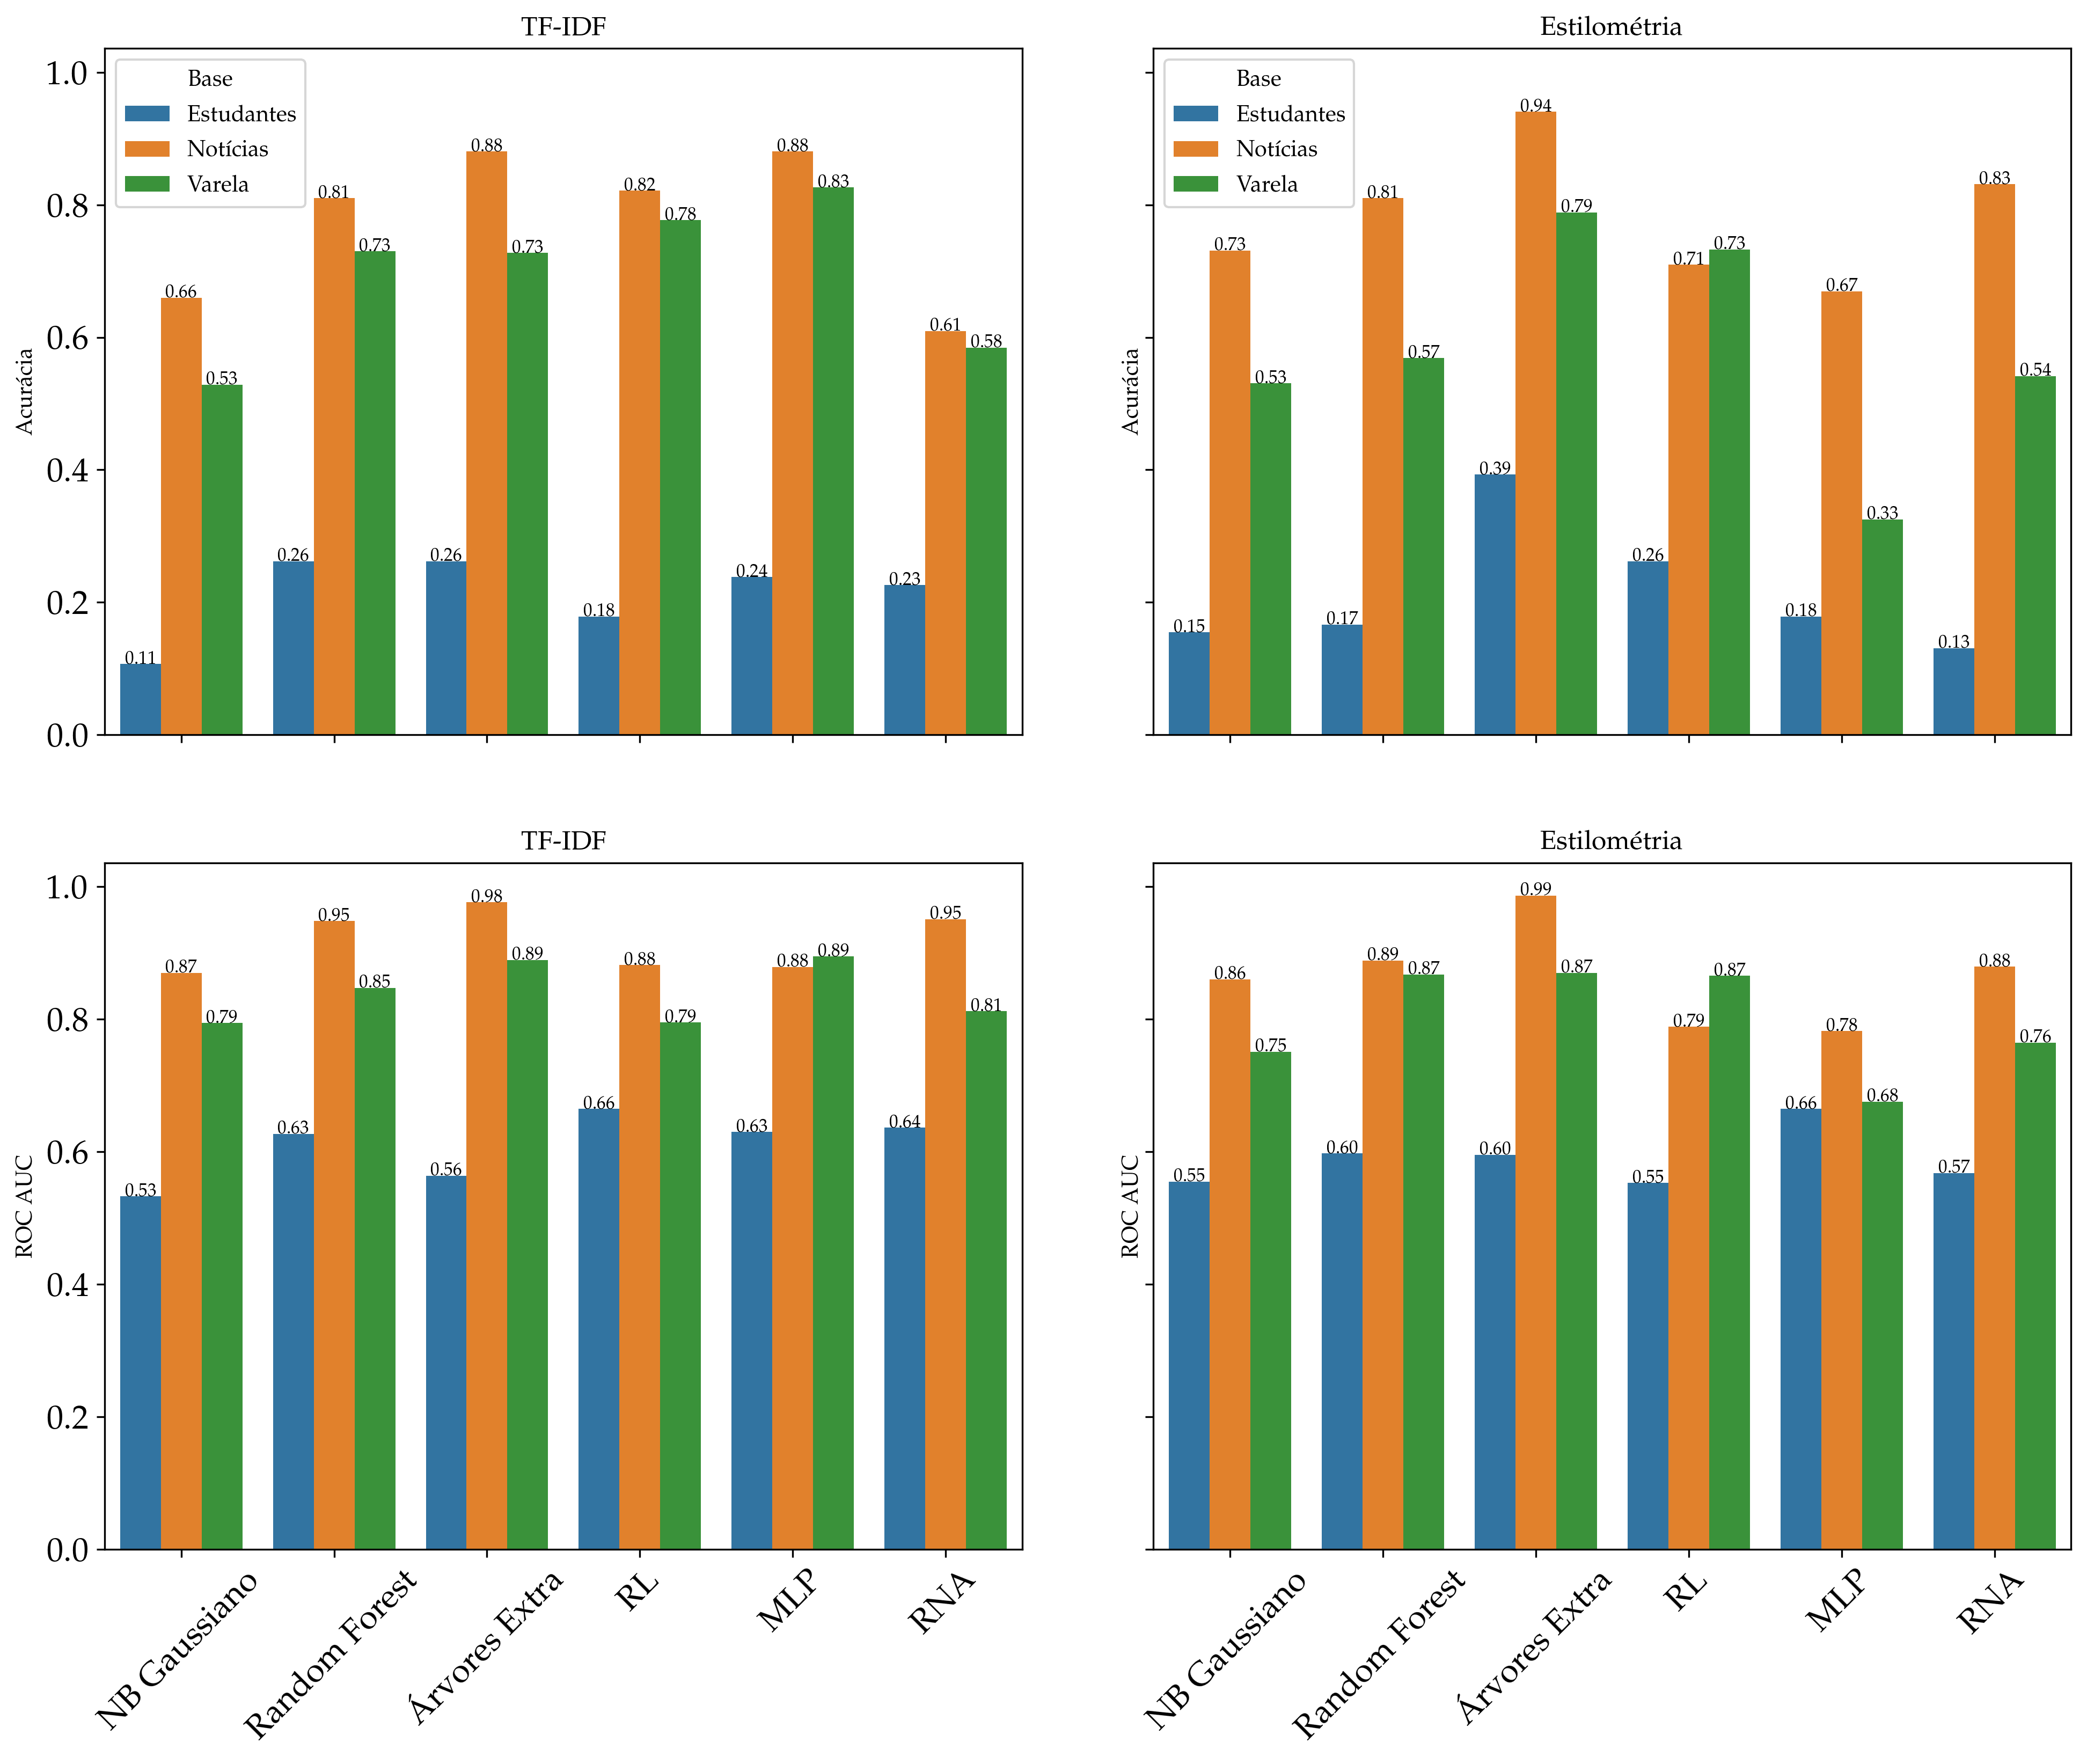

In [ ]:
def plot_metrics(dfs, metrics, title):
  fig, axes = plt.subplots(nrows=1, ncols=len(dfs), figsize=(14, 8))

  plt.rc('xtick',labelsize=8)
  plt.rc('ytick',labelsize=8)
  fig.autofmt_xdate(rotation=45)
  fig.suptitle(title)
  for idx, ax in enumerate(axes):
    new_df = dfs[idx].copy()
    new_df['Modelo'] = new_df.index
    new_df.reset_index(drop=True, inplace=True)
    tidy = new_df.melt(id_vars='Modelo').rename(columns=str.title)
    tidy.rename(inplace=True,columns={"Variable": "Base", "Value": metrics[idx]} )
    
    sns.barplot(x='Modelo', y=metrics[idx], hue='Base', data=tidy, ax=ax)



def plot_metrics_large(dfs, metrics, main_title, titles, legends, rotate=True, sharey=False):
  plt.rcParams['figure.dpi'] = 300
  fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(13, 10), sharey=sharey)
  fig.tight_layout(h_pad=3, w_pad=4)

  plt.rc('xtick',labelsize=14)
  plt.rc('ytick',labelsize=14)
  
  #fig.suptitle(main_title)
  for idx, ax in enumerate(axes.flat):
    ax.set_title(titles[idx])
    new_df = dfs[idx].copy()
    new_df['Modelo'] = new_df.index
    new_df.reset_index(drop=True, inplace=True)
    tidy = new_df.melt(id_vars='Modelo').rename(columns=str.title)
    tidy.rename(inplace=True,columns={"Variable": "Base", "Value": metrics[idx]} )
    
    g = sns.barplot(x='Modelo', y=metrics[idx], hue='Base', data=tidy, ax=ax)

    if not legends[idx]:
      ax.legend([],[], frameon=False)
    
    if (idx > 1):
      g.legend_.remove()

    if (idx <= 1):
      g.set(xticklabels=[])

    # if (idx % 2 != 0):
    #   g.set(yticklabels=[])

    if rotate:
      plt.setp(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('')
    anotatte_bars(ax)

def anotatte_bars(ax, extra_height=0):
  for p in ax.patches:
    x = p.get_x() + (p.get_width()/2)
    y = p.get_height() + extra_height
    ax.annotate("{:.2f}".format(p.get_height()), (x, y), ha='center', fontsize=8)

def build_acc_df(df, nn=False):
    merged_df = df.copy()
    merged_df.drop(columns='ROC AUC Estudantes', inplace=True)
    merged_df.drop(columns='ROC AUC Notícias', inplace=True)
    merged_df.drop(columns='ROC AUC Varela', inplace=True)
    return merged_df

def build_auc_df(df, nn=False):
    merged_df = df.copy()
    merged_df.drop(columns='Estudantes', inplace=True)
    merged_df.drop(columns='Notícias', inplace=True)
    merged_df.drop(columns='Varela', inplace=True)
    merged_df.rename(columns={'ROC AUC Estudantes': 'Estudantes', 'ROC AUC Notícias' : 'Notícias', 'ROC AUC Varela':'Varela'}, inplace=True)
    return merged_df

#plot_metrics([build_acc_df(stylo_acc_scores, True), build_auc_df(stylo_acc_scores, True)], ['Acurácia', 'ROC AUC'], 'Representação Estilométrica')
plot_metrics_large([
                    
                    build_acc_df(textual_acc_scores, True),
                    build_acc_df(stylo_acc_scores, True),
                    build_auc_df(textual_acc_scores, True),
                    build_auc_df(stylo_acc_scores, True),
                    
              ]
              , ['Acurácia', 'Acurácia', 'ROC AUC', 'ROC AUC'], 
             'Atribuição de Autoria', ['TF-IDF', 'Estilométria', 'TF-IDF', 'Estilométria'], [True,True, False, False], rotate=True, sharey=True)

In [ ]:

new_df = build_acc_df(textual_acc_scores, True)
new_df['Modelo'] = new_df.index + ' (RT)'
new_df.reset_index(drop=True, inplace=True)
tidy_text = new_df.melt(id_vars='Modelo').rename(columns=str.title)
tidy_text.rename(inplace=True,columns={"Variable": "Base", "Value": 'Acurácia'} )
tidy_text.groupby('Modelo').agg('mean')
#tidy_text.groupby('Modelo').agg('mean').sort_values(by='Accuracy', ascending=False)

,Acurácia
Modelo,
MLP (RT),0.648123
NB Gaussiano (RT),0.431770
RL (RT),0.592130
RNA (RT),0.473383
Random Forest (RT),0.600589
Árvores Extra (RT),0.623170


In [ ]:
tidy_text

,Modelo,Base,Acurácia
0,RT - NB Gaussiano,Estudantes,0.107143
1,RT - Random Forest,Estudantes,0.261905
2,RT - Árvores Extra,Estudantes,0.261905
3,RT - RL,Estudantes,0.178571
4,RT - MLP,Estudantes,0.238095
5,RT - RNA,Estudantes,0.226190
6,RT - NB Gaussiano,Notícias,0.659834
7,RT - Random Forest,Notícias,0.809863
8,RT - Árvores Extra,Notícias,0.880273
9,RT - RL,Notícias,0.821153


In [ ]:
new_df.index

RangeIndex(start=0, stop=6, step=1)

In [ ]:
new_df = build_acc_df(stylo_acc_scores, True)
new_df['Modelo'] = new_df.index + ' (RE)'
new_df.reset_index(drop=True, inplace=True)
tidy_st = new_df.melt(id_vars='Modelo').rename(columns=str.title)
tidy_st.rename(inplace=True,columns={"Variable": "Base", "Value": 'Acurácia'} )
tidy_st.groupby('Modelo').agg('mean')
#tidy_text.groupby('Modelo').agg('mean').sort_values(by='Accuracy', ascending=False)

d3 = tidy_st.groupby('Modelo').agg('mean')
d4= tidy_text.groupby('Modelo').agg('mean')

In [ ]:
tidy_text

,Modelo,Base,Acurácia
0,NB Gaussiano (RT),Estudantes,0.107143
1,Random Forest (RT),Estudantes,0.261905
2,Árvores Extra (RT),Estudantes,0.261905
3,RL (RT),Estudantes,0.178571
4,MLP (RT),Estudantes,0.238095
5,RNA (RT),Estudantes,0.226190
6,NB Gaussiano (RT),Notícias,0.659834
7,Random Forest (RT),Notícias,0.809863
8,Árvores Extra (RT),Notícias,0.880273
9,RL (RT),Notícias,0.821153


In [ ]:
test_all = tidy_st.append(tidy_text)

In [ ]:
stylo_acc_scores

,Estudantes,Notícias,ROC AUC Estudantes,ROC AUC Notícias,ROC AUC Varela,Varela
NB Gaussiano,0.154762,0.730838,0.554750,0.860375,0.750797,0.530667
Random Forest,0.166667,0.810160,0.597415,0.888431,0.867398,0.568667
Árvores Extra,0.392857,0.940285,0.595372,0.986550,0.870011,0.788667
RL,0.261905,0.709745,0.552697,0.788408,0.865400,0.732667
MLP,0.178571,0.669340,0.664537,0.782164,0.675600,0.325333
RNA,0.130952,0.830957,0.567738,0.879097,0.764826,0.541667


In [ ]:
D3 = pd.concat([d3, d4], axis=0).sort_values(by='Acurácia', ascending=False)
D6 = pd.concat([d3, d4], axis=0).sort_values(by='AUC', ascending=False)
D6.rename_axis(columns=None, inplace=True)

In [ ]:
new_df = D3.copy()
new_df['Modelo'] = new_df.index
new_df.reset_index(drop=True, inplace=True)
tidy = new_df.melt(id_vars='Modelo').rename(columns=str.title)
tidy.rename(inplace=True,columns={"Variable": "Base", "Value": 'Acurácia'} )
tidy.drop(columns=['Base'], inplace=True)
tidy

,Modelo,Acurácia
0,Árvores Extra (RE),0.707270
1,MLP (RT),0.648123
2,Árvores Extra (RT),0.623170
3,Random Forest (RT),0.600589
4,RL (RT),0.592130
5,RL (RE),0.568105
6,Random Forest (RE),0.515165
7,RNA (RE),0.501192
8,RNA (RT),0.473383
9,NB Gaussiano (RE),0.472089


In [ ]:
student_stylo = stylo_acc_scores.drop(columns=['Notícias','ROC AUC Notícias', 'ROC AUC Varela','Varela'])

In [ ]:
student_text = textual_acc_scores.drop(columns=['Notícias', 'ROC AUC Notícias', 'ROC AUC Varela','Varela'])
student_text['Modelo'] = student_text.index + ' (RT)'
student_text.set_index('Modelo', inplace=True, drop=True)
student_text

,Estudantes,ROC AUC Estudantes
Modelo,,
NB Gaussiano (RT),0.107143,0.532623
Random Forest (RT),0.261905,0.626919
Árvores Extra (RT),0.261905,0.563737
RL (RT),0.178571,0.664497
MLP (RT),0.238095,0.629784
RNA (RT),0.226190,0.636098


In [ ]:
student_stylo['Modelo'] = student_stylo.index + ' (RE)'
student_stylo.set_index('Modelo', inplace=True, drop=True)
student_stylo

,Estudantes,ROC AUC Estudantes
Modelo,,
NB Gaussiano (RE),0.154762,0.554750
Random Forest (RE),0.166667,0.597415
Árvores Extra (RE),0.392857,0.595372
RL (RE),0.261905,0.552697
MLP (RE),0.178571,0.664537
RNA (RE),0.130952,0.567738


In [ ]:
student_final_scores = student_text.append(student_stylo).sort_values(['Estudantes', 'ROC AUC Estudantes'], ascending=[False, False])
student_final_scores.rename(columns={'Estudantes': 'Acurácia'}, inplace=True)

In [ ]:
varela_df

,DiversidadeLexica,TamanhoMedioDasPalavras,TamanhoMedioSentencas,StdevSentencas,TamanhoMedioParagrafos,StdevTamParagrafos,FrequenciaDeParagrafos,FrequenciaPalavrasDuplicadas,MediaSilabasPorPalavra,Monossilabas,Ponto,Virgulas,Exclamacoes,DoisPontos,Citacoes,QuebrasDeLinha,Digitos,Adjetivos,Adverbios,Artigos,Substantivos,Preposicoes,Verbos,VerbosPtcp,Conjuncoes,Pronomes,PronomesPorPreposicao,TermosNaoTageados,PalavrasDeConteudo,PalavrasFuncionais,FrasesNominais,FrasesVerbais,GenMasc,GenFem,SemGenero,Singular,Plural,PrimeiraPessoa,TerceiraPessoa,Passado,Presente,Futuro,TotalEntidadesNomeadas,EntAbstracao,EntAcontecimento,EntCoisa,EntLocal,EntOrganizacao,EntObra,EntOutro,EntPessoa,EntTempo,EntValor,GuiraudR,HerdanC,HerdanV,MedidaK,DugastU,MaasA,HonoresH,PalavrasErroOrtografico,HapaxLegomenaLocal,PalavrasComunsTam2,PalavrasComunsTam3,PalavrasComunsTam4,StopWords,BRFleshIndex,OperadoresLogicos,PalavrasCapitalizadas,Global hapax,top 1-gram,top 3-gram,top 4-gram,top 5-gram
0,52.4721,6.4225,21.7600,15.9581,544.0,0.0,0.001595,0.0638,2.186603,0.094099,2.711324,5.582137,1.275917,0.797448,0.0,0.0,0.019139,0.063796,0.025518,0.082935,0.196172,0.111643,0.022329,0.087719,0.052632,0.046252,0.414286,0.090909,0.449761,0.247209,0.0064,0.1196,0.261563,0.287081,0.007974,0.462520,0.169059,0.009569,0.086124,0.009569,0.055821,0.003190,0.0845,0.132075,0.037736,0.094340,0.075472,0.037736,0.018868,0.169811,0.075472,0.245283,0.113208,13.1390,0.8999,329.0,2.6001,92.8088,0.1038,0.7933,0.073365,0.4163,0.006380,0.014354,0.020734,0.3493,433.790845,0.043062,0.0,0.011850,0.041333,0.0,0.0,0.0
1,50.6390,6.6032,29.2632,19.1004,555.0,0.0,0.001597,0.0751,2.161342,0.071885,2.236422,3.674121,0.000000,0.479233,0.0,0.0,0.063898,0.073482,0.014377,0.062300,0.215655,0.118211,0.014377,0.091054,0.070288,0.043131,0.364865,0.111821,0.474441,0.250799,0.0144,0.1038,0.343450,0.204473,0.006390,0.432907,0.180511,0.004792,0.068690,0.007987,0.039936,0.006390,0.0927,0.120690,0.051724,0.051724,0.068966,0.068966,0.017241,0.172414,0.017241,0.327586,0.103448,12.6699,0.8943,317.0,2.5837,87.9151,0.1067,0.7634,0.075080,0.3866,0.011182,0.022364,0.031949,0.3546,431.650471,0.059105,0.0,0.013215,0.049333,0.0,0.0,0.0
2,49.0415,6.5147,39.5714,41.4138,554.0,0.0,0.001597,0.0719,2.156550,0.087859,1.437700,4.792332,0.479233,0.319489,0.0,0.0,0.039936,0.068690,0.030351,0.086262,0.186901,0.091054,0.015974,0.097444,0.052716,0.062300,0.684211,0.076677,0.500000,0.230032,0.0144,0.1070,0.289137,0.276358,0.009585,0.501597,0.150160,0.019169,0.081470,0.007987,0.071885,0.000000,0.0799,0.020000,0.100000,0.020000,0.160000,0.100000,0.020000,0.220000,0.040000,0.240000,0.080000,12.2702,0.8894,307.0,2.5693,83.9600,0.1091,0.7524,0.084665,0.3690,0.011182,0.023962,0.031949,0.3994,431.246661,0.051118,0.0,0.012224,0.050667,0.0,0.0,0.0
3,51.0519,5.7956,14.3415,11.4159,588.0,0.0,0.001403,0.0645,1.922861,0.103787,4.347826,6.171108,0.841515,0.981767,0.0,0.0,0.022440,0.029453,0.051893,0.075736,0.168303,0.077139,0.008415,0.106592,0.030856,0.084151,1.090909,0.086957,0.453015,0.183731,0.0070,0.1403,0.253857,0.241234,0.004208,0.513324,0.086957,0.016830,0.106592,0.030856,0.056101,0.002805,0.1010,0.111111,0.041667,0.013889,0.152778,0.097222,0.013889,0.069444,0.097222,0.208333,0.194444,13.6319,0.8977,364.0,2.6222,92.6096,0.1039,0.7720,0.065919,0.3941,0.004208,0.005610,0.008415,0.3464,411.457805,0.044881,0.0,0.017222,0.041667,0.0,0.0,0.0
4,47.5795,5.9620,22.1786,20.2838,621.0,0.0,0.001383,0.0664,1.975104,0.078838,2.766252,6.639004,1.106501,0.691563,0.0,0.0,0.016598,0.042877,0.035961,0.084371,0.146611,0.084371,0.011065,0.096819,0.053942,0.059474,0.704918,0.116183,0.427386,0.222683,0.0138,0.1024,0.260028,0.254495,0.008299,0.507607,0.112033,0.013831,0.105118,0.024896,0.058091,0.001383,0.1065,0.051948,0.116883,0.025974,0.181818,0.116883,0.064935,0.077922,0.038961,0.246753,0.077922,12.7935,0.8872,344.0,2.5946,84.1828,0.1090,0.7500,0.082988,0.3568,0.024896,0.027663,0.027663,0.3790,415.888064,0.044260,0.0,0.018837,0.050000,0.0,0.0,0.0
...,...,..

In [ ]:
student_final_scores

,Acurácia,ROC AUC Estudantes
Modelo,,
Árvores Extra (RE),0.392857,0.595372
Random Forest (RT),0.261905,0.626919
RL (RE),0.261905,0.552697
Árvores Extra (RT),0.261905,0.563737
MLP (RT),0.238095,0.629784
RNA (RT),0.226190,0.636098
MLP (RE),0.178571,0.664537
RL (RT),0.178571,0.664497
Random Forest (RE),0.166667,0.597415


In [ ]:
std_scores_with_variance

,Acurácia,Modelo
0,0.392857,Árvores Extra (RE)
1,0.261905,Random Forest (RT)
2,0.261905,RL (RE)
3,0.261905,Árvores Extra (RT)
4,0.238095,MLP (RT)
5,0.226190,RNA (RT)
6,0.178571,MLP (RE)
7,0.178571,RL (RT)
8,0.166667,Random Forest (RE)
9,0.154762,NB Gaussiano (RE)


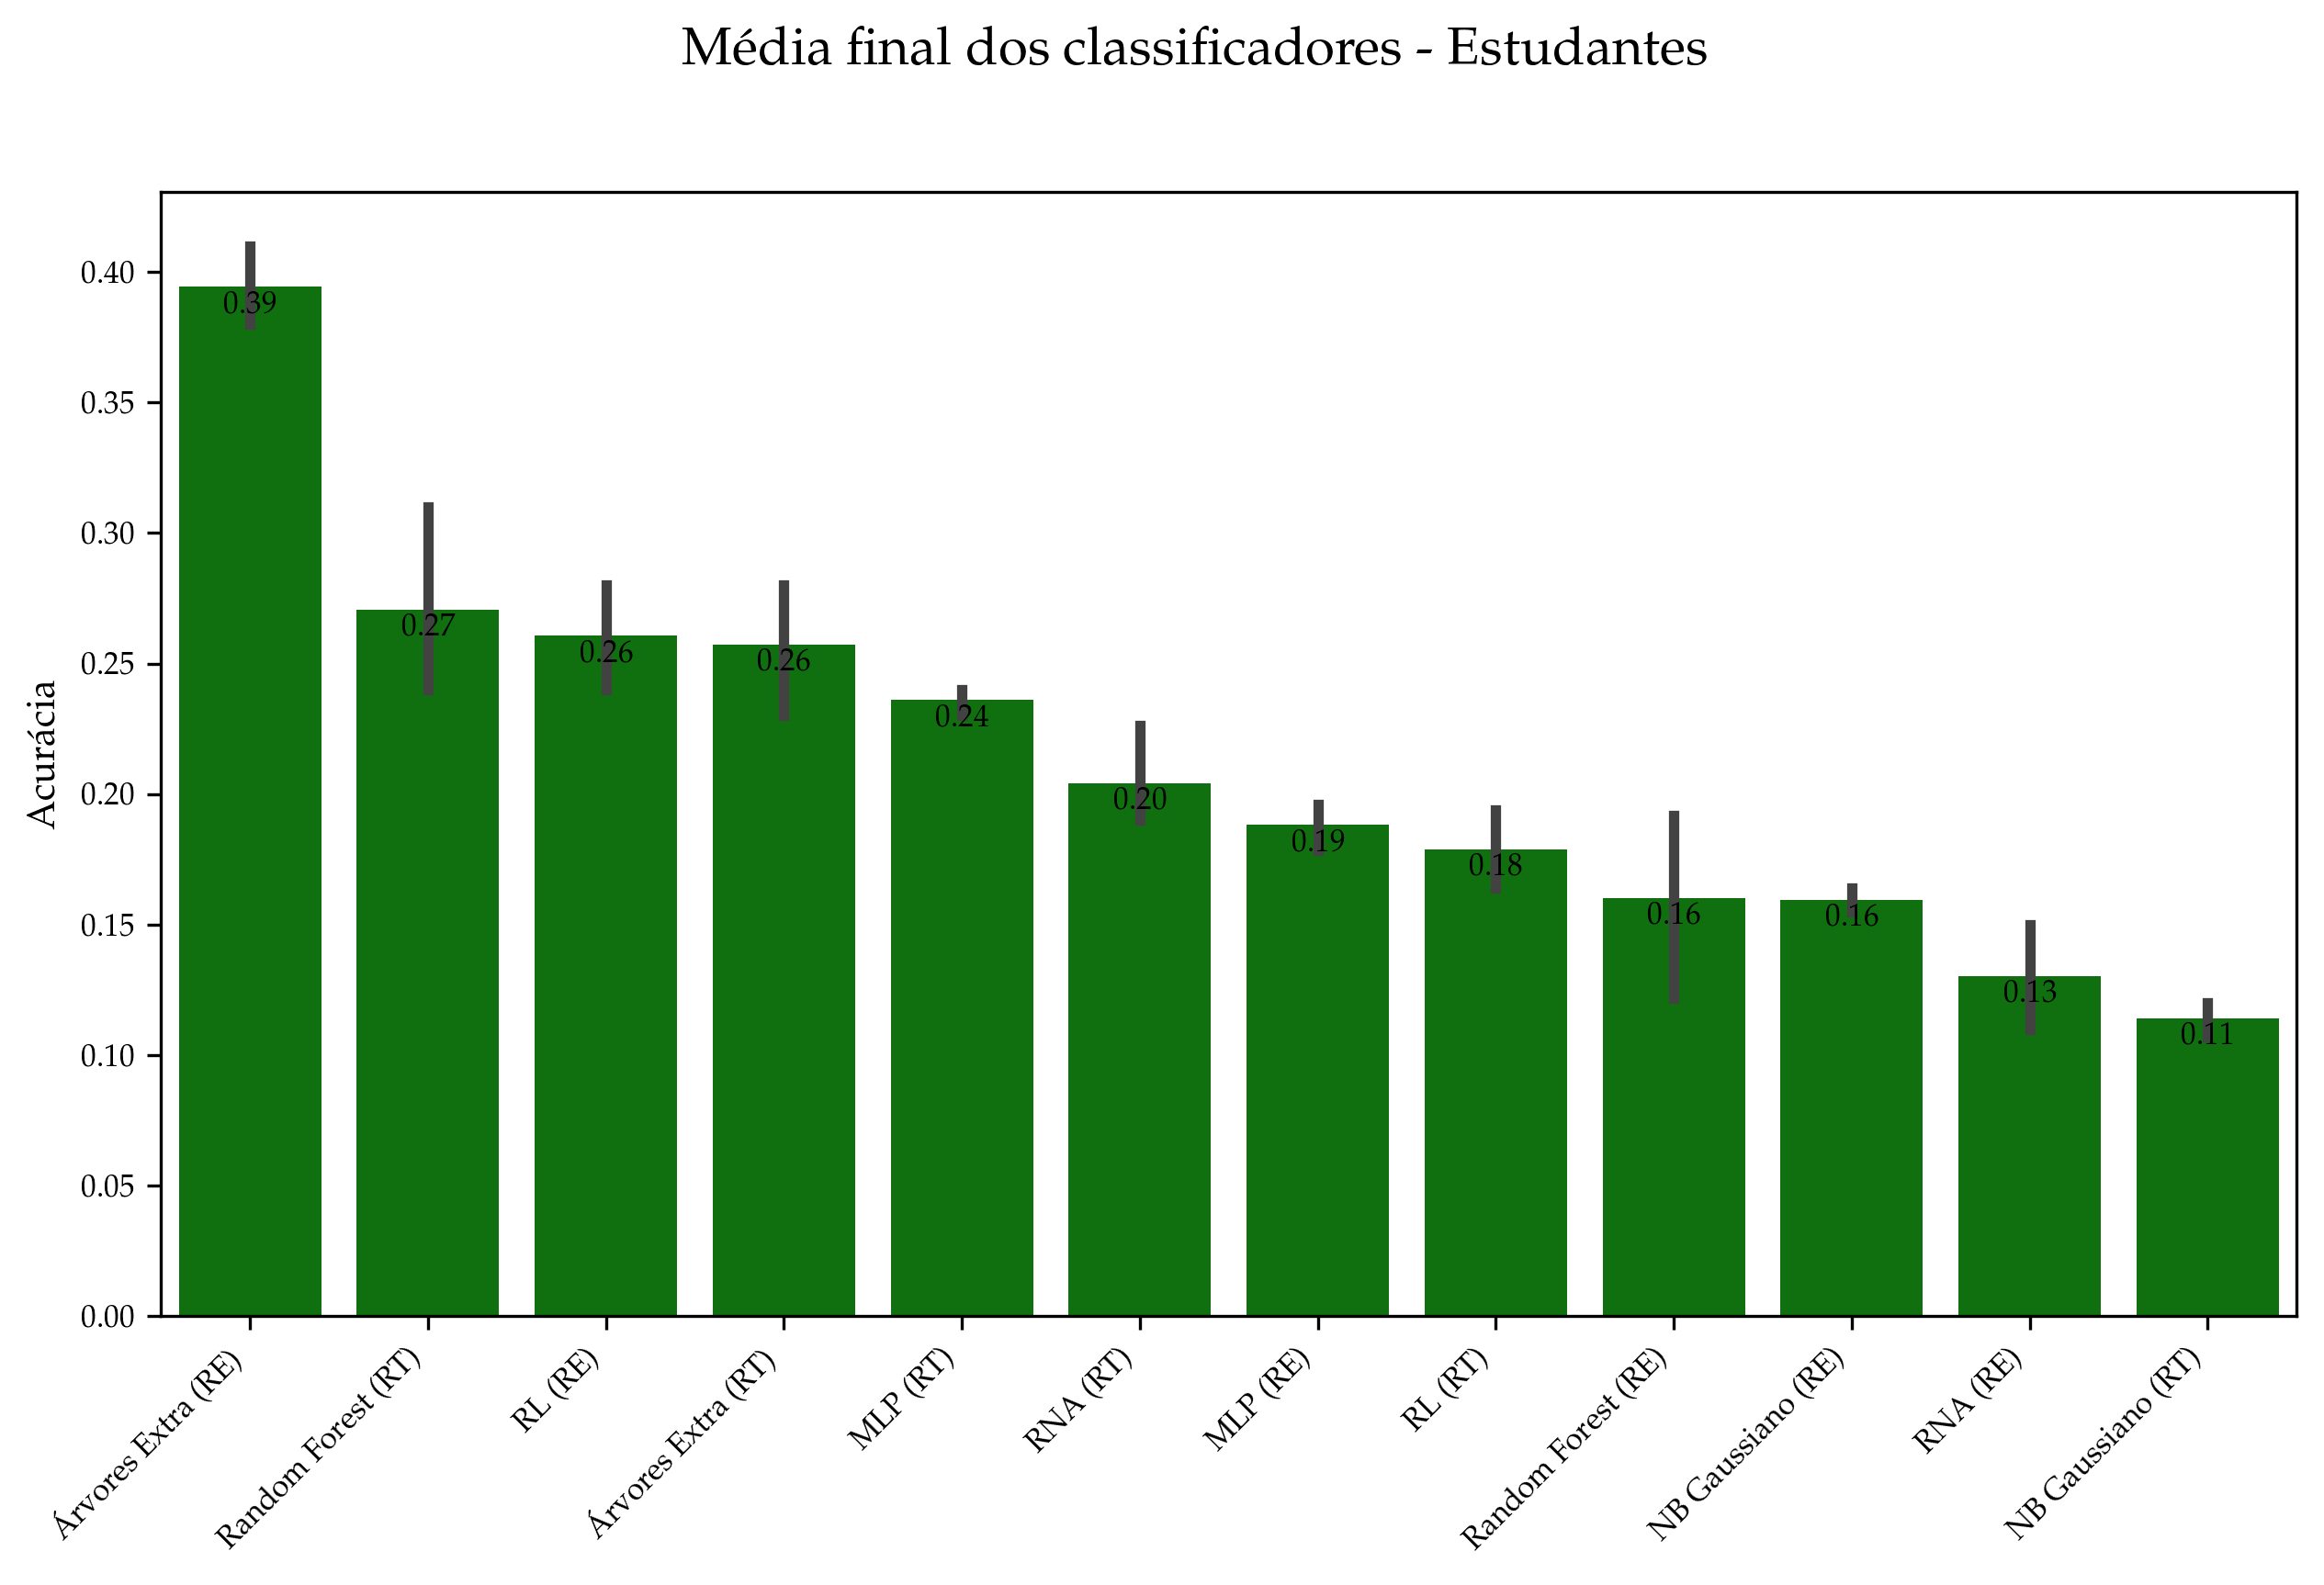

In [ ]:
#aqui
fig, ax = plt.subplots(figsize=(10, 6))
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
fig.autofmt_xdate(rotation=45)  
fig.suptitle('Média final dos classificadores - Estudantes', size=14)
g = sns.barplot(x="Modelo", y="Acurácia", data=std_scores_with_variance, ax=ax, color='g')
g.set(xlabel=None)
anotatte_bars(ax, -0.01)



In [ ]:
student_final_scores['Acurácia'].index

Index(['RE - Árvores Extra', 'RT - Random Forest', 'RE - RL',
       'RT - Árvores Extra', 'RT - MLP', 'RT - RNA', 'RE - MLP', 'RT - RL',
       'RE - Random Forest', 'RE - NB Gaussiano', 'RE - RNA',
       'RT - NB Gaussiano'],
      dtype='object', name='Modelo')

Árvores Extra (RE)
7
current idx0old rank:7
MLP (RT)
1
current idx1old rank:1
Árvores Extra (RT)
3
current idx2old rank:3
Random Forest (RT)
5
current idx3old rank:5
RL (RT)
2
current idx4old rank:2
RL (RE)
10
current idx5old rank:10
Random Forest (RE)
8
current idx6old rank:8
RNA (RE)
12
current idx7old rank:12
RNA (RT)
4
current idx8old rank:4
NB Gaussiano (RE)
6
current idx9old rank:6
NB Gaussiano (RT)
9
current idx10old rank:9
MLP (RE)
11
current idx11old rank:11


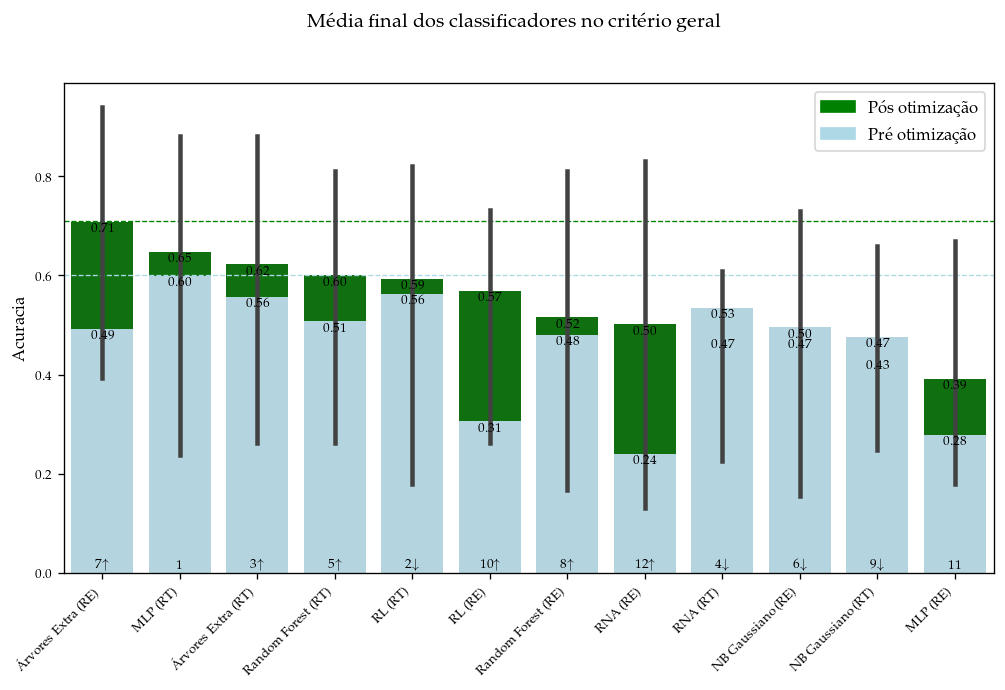

In [ ]:
import matplotlib.patches as mpatches

def anotatte_bars(ax, extra_height=0):
  for p in ax.patches:
    x = p.get_x() + (p.get_width()/2)
    y = p.get_height() + extra_height
    ax.annotate("{:.2f}".format(p.get_height()), (x, y), ha='center', fontsize=8)

def anotatte_ranks(ax, df):
  for idx, p in enumerate(ax.patches):
    x = p.get_x() + (p.get_width()/2)
    y = 0.01
    if idx <= 11:
      current_model = test_all.groupby('Modelo').agg('mean').sort_values(by='Acurácia', ascending=False).index[idx]
      print(current_model)
      old_rank = df.loc[df['Modelo'] == current_model]['Rank'].item()
      print(old_rank)
      op = old_rank

      print('current idx': + idx + 'old rank:' + old_rank)
      if (idx < old_rank):
        op = str(old_rank) + "$\\uparrow$"
      if (idx > old_rank):
        op = str(old_rank) + "$\downarrow$"
        
      ax.annotate(op, (x, y), ha='center', fontsize=8)


def new_plot_final_metrics(df, metric, title):
  fig, ax = plt.subplots(figsize=(10, 6))

  plt.rc('xtick',labelsize=8)
  plt.rc('ytick',labelsize=8)
  fig.autofmt_xdate(rotation=45)
  fig.suptitle(title)
  
  new_df = df.copy()
  new_df['Modelo'] = new_df.index
  new_df.reset_index(drop=True, inplace=True)
  tidy = new_df.melt(id_vars='Modelo').rename(columns=str.title)
  tidy.rename(inplace=True,columns={"Variable": "Base", "Value": metric} )
  tidy.drop(columns=['Base'], inplace=True)
  
  ax.axhline(y=0.60,  color='lightblue', linestyle='--',lw=0.8)
  ax.axhline(y=0.71,  color='g', linestyle='--',lw=0.8)
  g = sns.barplot(x="Modelo", y="Acurácia", data=df, ax=ax, color='g', order=test_all.groupby('Modelo').agg('mean').sort_values(by='Acurácia', ascending=False).index)
  bar2 = sns.barplot(x="Modelo", y="Acuracia", data=pre_opt_scores, ax=ax, order=test_all.groupby('Modelo').agg('mean').sort_values(by='Acurácia', ascending=False).index, color='lightblue')
  
  g.set(xlabel=None)
  anotatte_bars(ax, -0.02)
  anotatte_ranks(ax, pre_opt_scores)

  top_bar = mpatches.Patch(color='g', label='Pós otimização')
  bottom_bar = mpatches.Patch(color='lightblue', label='Pré otimização')
  plt.legend(handles=[top_bar, bottom_bar]) 

new_plot_final_metrics(test_all.sort_values(by='Acurácia', ascending=False), 'Acurácia', 'Média final dos classificadores no critério geral')



In [ ]:
pre_opt_scores.loc[pre_opt_scores['Modelo'] == 'Árvores Extra (RE)']['Rank'].item()


7

In [ ]:
pre_opt_scores

,Acuracia,Modelo,Rank
0,0.2403,RNA (RE),12
1,0.3060,RL (RE),10
2,0.4807,Random Forest (RE),8
3,0.5349,RNA (RT),4
4,0.4750,NB Gaussiano (RT),9
5,0.5993,MLP (RT),1
6,0.5575,Árvores Extra (RT),3
7,0.5073,Random Forest (RT),5
8,0.5633,RL (RT),2
9,0.2786,MLP (RE),11


In [ ]:
pre_opt_scores['Rank'] = pre_opt_scores['Acuracia'].rank(ascending=False).astype(int)

In [ ]:
pre_opt_scores.to_csv('pre-optimization-scores.csv')
#aki

In [ ]:
pre_opt_scores

,Acuracia,Modelo,Rank
0,0.2403,RNA (RE),12
1,0.3060,RL (RE),10
2,0.4807,Random Forest (RE),8
3,0.5349,RNA (RT),4
4,0.4750,NB Gaussiano (RT),9
5,0.5993,MLP (RT),1
6,0.5575,Árvores Extra (RT),3
7,0.5073,Random Forest (RT),5
8,0.5633,RL (RT),2
9,0.2786,MLP (RE),11


In [ ]:
pre_opt_scores = build_df('1HPw9CUSnokn9VCTPuk08_unqogGkYUW7', 'pre-opt').drop(columns=['Unnamed: 0'])
pre_opt_scores

,Acuracia,Modelo,Rank
0,0.2403,RNA (RE),12
1,0.3060,RL (RE),10
2,0.4807,Random Forest (RE),8
3,0.5349,RNA (RT),4
4,0.4750,NB Gaussiano (RT),9
5,0.5993,MLP (RT),1
6,0.5575,Árvores Extra (RT),3
7,0.5073,Random Forest (RT),5
8,0.5633,RL (RT),2
9,0.2786,MLP (RE),11


In [ ]:
pre_opt_scores

,Acuracia,Modelo
0,0.2403,RNA (RE)
1,0.3060,RL (RE)
2,0.4807,Random Forest (RE)
3,0.5349,RNA (RT)
4,0.4750,NB Gaussiano (RT)
5,0.5993,MLP (RT)
6,0.5575,Árvores Extra (RT)
7,0.5073,Random Forest (RT)
8,0.5633,RL (RT)
9,0.2786,MLP (RE)


In [ ]:
test_all

,Modelo,Acurácia
8,Árvores Extra (RE),0.940285
8,Árvores Extra (RT),0.880273
10,MLP (RT),0.880273
11,RNA (RE),0.830957
16,MLP (RT),0.826000
9,RL (RT),0.821153
7,Random Forest (RE),0.810160
7,Random Forest (RT),0.809863
14,Árvores Extra (RE),0.788667
15,RL (RT),0.776667


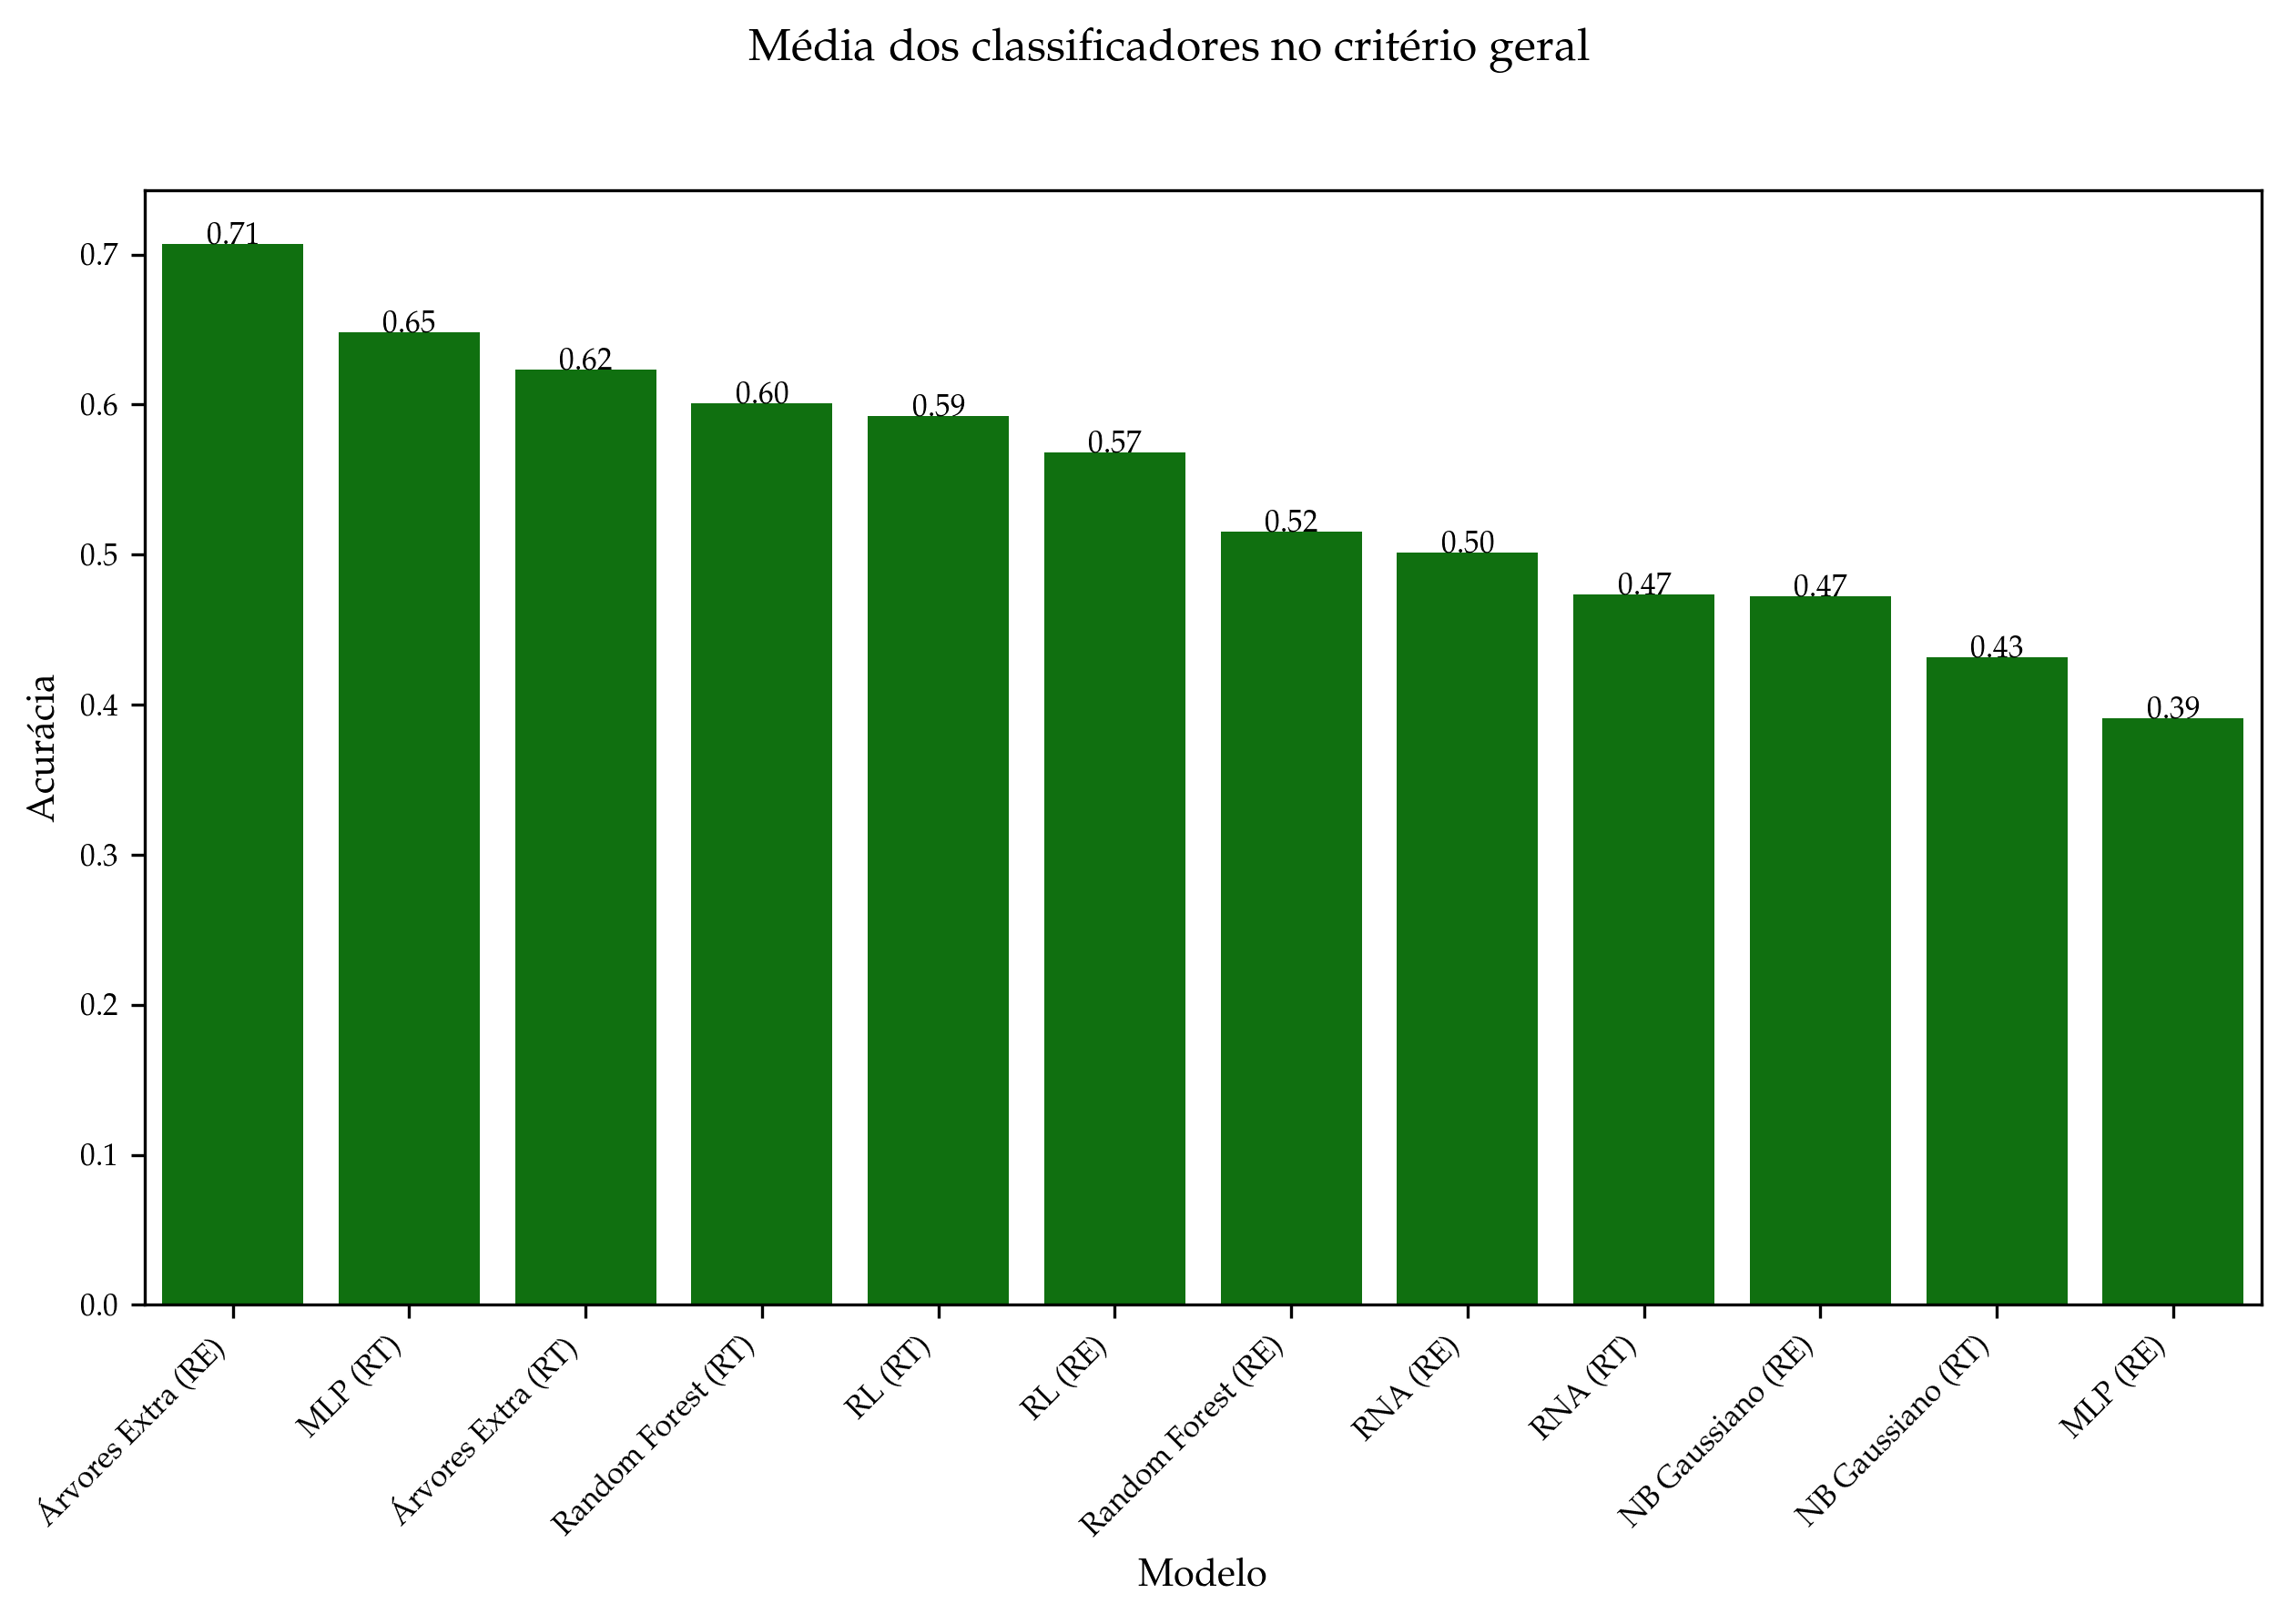

In [ ]:
def plot_final_metrics(df, metric, title):
  fig, ax = plt.subplots(figsize=(10, 6))

  plt.rc('xtick',labelsize=8)
  plt.rc('ytick',labelsize=8)
  fig.autofmt_xdate(rotation=45)
  fig.suptitle(title)
  
  new_df = df.copy()
  new_df['Modelo'] = new_df.index
  new_df.reset_index(drop=True, inplace=True)
  tidy = new_df.melt(id_vars='Modelo').rename(columns=str.title)
  tidy.rename(inplace=True,columns={"Variable": "Base", "Value": metric} )
  tidy.drop(columns=['Base'], inplace=True)
  
  sns.barplot(x='Modelo', y=metric, data=tidy, ax=ax, color='g')
  anotatte_bars(ax)

plot_final_metrics(D3, 'Acurácia', 'Média dos classificadores no critério geral')




In [ ]:
D3

,Acurácia
Modelo,
RE - Árvores Extra,0.707270
RT - MLP,0.648123
RT - Árvores Extra,0.623170
RT - Random Forest,0.600589
RT - RL,0.592130
RE - RL,0.568105
RE - Random Forest,0.515165
RE - NB Gaussiano,0.472089
RT - RNA,0.449574


In [ ]:
D6

,AUC
Modelo,
RE - Árvores Extra,0.817311
RT - Árvores Extra,0.809885
RT - Random Forest,0.807411
RT - MLP,0.801143
RE - Random Forest,0.784415
RT - RL,0.780367
RE - RL,0.735502
RT - NB Gaussiano,0.732279
RE - NB Gaussiano,0.721974


In [ ]:
#students_df.merge(news_df, left_index=True, right_index=True, suffixes=('_estudantes', '_notícias'))

d1.merge(d2, left_on='Accuracy')

In [ ]:
new_df = build_auc_df(textual_acc_scores, True)
new_df['Modelo'] = new_df.index
new_df.reset_index(drop=True, inplace=True)
tidy_text = new_df.melt(id_vars='Modelo').rename(columns=str.title)
tidy_text.rename(inplace=True,columns={"Variable": "Base", "Value": 'AUC'} )
tidy_text.groupby('Modelo').agg('mean').sort_values(by='AUC', ascending=False)

,AUC
Modelo,
Random Forest,0.853198
RL,0.813700
Árvores Extra,0.809885
MLP,0.804476
RNA,0.777937
NB Gaussiano,0.732279


In [ ]:
new_df = build_auc_df(stylo_acc_scores, True)
new_df['Modelo'] = new_df.index
new_df.reset_index(drop=True, inplace=True)
tidy_text = new_df.melt(id_vars='Modelo').rename(columns=str.title)
tidy_text.rename(inplace=True, columns={"Variable": "Base", "Value": 'AUC'} )
tidy_text.groupby('Modelo').agg('mean').sort_values(by='AUC', ascending=False)

# top 3 AUC
# stylo - ET
# textual - RF + RL


#stylo ET
#textual MLP + ET

,AUC
Modelo,
Árvores Extra,0.817311
Random Forest,0.784415
RL,0.735502
NB Gaussiano,0.721974
MLP,0.707434
RNA,0.520194
